## 1. Import all the libraries needed during the analysis

In [38]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime


## 2. Data Preparation and Cleaning

In [39]:
#Loading dataset

df_marathon = pd.read_csv("./data/MarathonData.csv")

In [40]:
df_marathon.head(10)

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,NaN,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,NaN,1.36,2.74,A
5,6,Prague17,David Pecina,M40,42.2,13.612903,NaN,1.32,2.78,A
6,7,Prague17,Tomas Drabek,M40,89.0,12.594340,NaN,1.38,2.81,A
7,8,Prague17,Jan Rada,M45,106.0,12.694611,NaN,1.41,2.84,A
8,9,Prague17,Tomas Drabek,MAM,70.0,13.770492,ciclista 1h,1.38,2.83,A
9,10,Prague17,martin ?indel ?,M45,84.2,13.365079,NaN,1.35,2.86,A


In [41]:
df_marathon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             87 non-null     int64  
 1   Marathon       87 non-null     object 
 2   Name           87 non-null     object 
 3   Category       81 non-null     object 
 4   km4week        87 non-null     float64
 5   sp4week        87 non-null     float64
 6   CrossTraining  13 non-null     object 
 7   Wall21         87 non-null     object 
 8   MarathonTime   87 non-null     float64
 9   CATEGORY       87 non-null     object 
dtypes: float64(3), int64(1), object(6)
memory usage: 6.9+ KB


In [42]:
df_marathon.isnull().sum()

id                0
Marathon          0
Name              0
Category          6
km4week           0
sp4week           0
CrossTraining    74
Wall21            0
MarathonTime      0
CATEGORY          0
dtype: int64

In [43]:
df_marathon["CrossTraining"].unique()

# It is not necessary to get rid of the CrossTraining column (74 null values) because it is an optional column showing if the athletes were doing any cross trainings

array([nan, 'ciclista 1h', 'ciclista 4h', 'ciclista 13h', 'ciclista 5h',
       'ciclista 3h'], dtype=object)

In [44]:
# Replacing empty values in the CrossTraining column with nocrosstr

df_marathon["CrossTraining"].fillna("nocrosstr", inplace = True)

/var/folders/r2/m617yygs46q4sg5bxxgr4c6r0000gn/T/ipykernel_84449/392539542.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_marathon["CrossTraining"].fillna("nocrosstr", inplace = True)


In [45]:
df_marathon["Category"].unique()

array(['MAM', 'M45', 'M40', 'M50', 'M55', nan, 'WAM'], dtype=object)

In [46]:
df_marathon["Category"].isna().sum()

np.int64(6)

In [47]:
#Removing rows with empty value in the Category column
df_marathon.dropna(how="any", inplace=True)

In [48]:
df_marathon['Category'].value_counts()

Category
MAM    40
M45    15
M40    15
M50     4
WAM     4
M55     3
Name: count, dtype: int64

In [49]:
# Creating a new column "MaxGroupAge" to translate the info in the category column into a more readable format

df_marathon.loc[df_marathon['Category'] == 'MAM', 'MaxGroupAge'] = 40
df_marathon.loc[df_marathon['Category'] == 'M40', 'MaxGroupAge'] = 45
df_marathon.loc[df_marathon['Category'] == 'M45', 'MaxGroupAge'] = 50
df_marathon.loc[df_marathon['Category'] == 'M50', 'MaxGroupAge'] = 55
df_marathon.loc[df_marathon['Category'] == 'M55', 'MaxGroupAge'] = 60
df_marathon.loc[df_marathon['Category'] == 'WAM', 'MaxGroupAge'] = 40

In [50]:
df_marathon.head(15)

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY,MaxGroupAge
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,nocrosstr,1.16,2.37,A,40.0
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,nocrosstr,1.23,2.59,A,40.0
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,nocrosstr,1.30,2.66,A,40.0
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,nocrosstr,1.32,2.68,A,50.0
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,nocrosstr,1.36,2.74,A,40.0
5,6,Prague17,David Pecina,M40,42.2,13.612903,nocrosstr,1.32,2.78,A,45.0
6,7,Prague17,Tomas Drabek,M40,89.0,12.594340,nocrosstr,1.38,2.81,A,45.0
7,8,Prague17,Jan Rada,M45,106.0,12.694611,nocrosstr,1.41,2.84,A,50.0
8,9,Prague17,Tomas Drabek,MAM,70.0,13.770492,ciclista 1h,1.38,2.83,A,40.0
9,10,Prague17,martin ?indel ?,M45,84.2,13.365079,nocrosstr,1.35,2.86,A,50.0


In [51]:
df_marathon['MaxGroupAge'] = df_marathon['MaxGroupAge'].astype(int)

In [52]:
# Replacing empty values in the Wall21 column with NaN and converting the column to float instead of object

df_marathon['Wall21'] = df_marathon['Wall21'].replace("-", np.nan)

df_marathon['Wall21'] = df_marathon['Wall21'].astype(float)

In [53]:
# The Name column seems to have weird caracters. Checking specific rows with issues
non_ascii_names = df_marathon[df_marathon['Name'].str.contains(r'[^\x00-\x7F]', na=False)]
print(non_ascii_names)

    id  Marathon               Name Category  km4week    sp4week  \
3    4  Prague17      Daniel Or lek      M45    137.5  12.258544   
4    5  Prague17       Luk ? Mr zek      MAM     84.6  13.945055   
9   10  Prague17    martin ?indel ?      M45     84.2  13.365079   
12  13  Prague17       Tom ? K?e?ek      M45     53.5  14.078947   
13  14  Prague17        Ji?، Polcar      M40     84.4  13.836066   
16  17  Prague17     Jپrgen Steiner      M55    112.3  12.594393   
19  20  Prague17    Vlastimil Lys k      MAM     76.7   8.031414   
20  21  Prague17       Radek Dvo? k      MAM     94.5  11.886792   
21  22  Prague17      Jind?ich Lisى      M40     67.3  13.239344   
29  30  Prague17   Jaroslav Jur sek      M50    104.9  11.720670   
36  37  Prague17      Luk ? Kozubik      MAM     50.1  12.170040   
52  53  Prague17      Luk ? Charv t      M40    121.7   9.907734   
61  62  Prague17  Jaroslav Valeri n      MAM     54.1  11.116438   
77  78  Prague17       Luk ? Pe?iva      MAM    

In [54]:
# Force UTF-8 encoding on the Name column
df_marathon['Name'] = df_marathon['Name'].apply(lambda x: x.encode('utf-8', errors='replace').decode('utf-8') if isinstance(x, str) else x)

In [55]:
df_marathon.head(5)

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY,MaxGroupAge
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,nocrosstr,1.16,2.37,A,40
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,nocrosstr,1.23,2.59,A,40
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,nocrosstr,1.30,2.66,A,40
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,nocrosstr,1.32,2.68,A,50
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,nocrosstr,1.36,2.74,A,40


In [56]:
# Checking duplicates
df_marathon.duplicated().sum()


np.int64(0)

In [57]:
# Checking if all the data in the dataset is from the same marathon (Prague17)
is_all_same = (df_marathon['Marathon'] == 'Prague17').all()
print(is_all_same)

True


In [58]:
df_marathon.describe()

,id,km4week,sp4week,Wall21,MarathonTime,MaxGroupAge
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,43.283951,62.650617,149.305494,1.630617,3.306914,44.259259
std,25.492271,26.844590,1234.766228,0.210490,0.380617,5.596378
min,1.000000,17.900000,8.031414,1.160000,2.370000,40.000000
25%,21.000000,45.200000,11.566474,1.450000,2.990000,40.000000
50%,43.000000,59.100000,12.163424,1.620000,3.320000,40.000000
75%,65.000000,78.200000,12.878981,1.760000,3.590000,50.000000
max,87.000000,137.500000,11125.000000,2.050000,3.980000,60.000000


## 3. Columns Description

Column description to decide if I need to transform any more columns: 

| Column/Variable   | Description                                                                                           | Type       |
| ------------------|-------------------------------------------------------------------------------------------------------|------------|
| Marathon          | Tells us the name of the Marathon (Prague17 for all entries)                                         | Categorical |
| Name              | Name of the athlete                                                                                  | Categorical |
| Category          | Sex and age group of a runner                                                                        | Categorical |
| km4week           | Average number of kilometers run per week in the last 4 weeks before the marathon, marathon included | Numerical   |
| sp4week           | Represents a measure of speed, but its values **don’t match the common unit of minutes per kilometer**| Numerical   |
| CrossTraining     | Shows if an athlete is also a cross trainer in other disciplines                                     | Categorical |
| Wall21            | Times (**in hours**) for the first half marathon                                                     | Numerical   |
| MarathonTime      | Marathon finish times in **hours and fractions of hours**                                            | Numerical   |
| CATEGORY          | Ancillary field. A = results under 3h, B = between 3h-3h20m, C = between 3h20m-3h40m, D = between 3h40-4h | Categorical |
| MaxGroupAge       | Based on the category column, shows the max age of the corresponding group                           | Numerical   |

## 4. Data Transformation & Validation

In [59]:
df_marathon.describe()

,id,km4week,sp4week,Wall21,MarathonTime,MaxGroupAge
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,43.283951,62.650617,149.305494,1.630617,3.306914,44.259259
std,25.492271,26.844590,1234.766228,0.210490,0.380617,5.596378
min,1.000000,17.900000,8.031414,1.160000,2.370000,40.000000
25%,21.000000,45.200000,11.566474,1.450000,2.990000,40.000000
50%,43.000000,59.100000,12.163424,1.620000,3.320000,40.000000
75%,65.000000,78.200000,12.878981,1.760000,3.590000,50.000000
max,87.000000,137.500000,11125.000000,2.050000,3.980000,60.000000


Wall21 and MarathonTime values have times in hours and fractions of hours which might be confusing for our audience. Also, the sp4week column appears to represent a measure of speed, but its values don’t match the common unit of minutes per kilometer. 
Instead, these values seem more aligned with kilometers per hour (km/h), where higher values indicate faster speeds.
I decided to convert them to a more common format, i.e. hours and minutes (or better minutes to avoid object types errors)

**Marathon Time**

The times are likely recorded as decimal hours. For example:

•	2.90 hours means **2 hours and 0.90 of an hour**, which is approximately **2 hours and 54 minutes**.

In [60]:
total_minutes = []

for time in df_marathon['MarathonTime']:
    h = int(time)  
    min = round((time - h) * 60)  
    total_minutes.append(h * 60 + min)  

# Add the total minutes as a new column to the DataFrame
df_marathon['MarathonTime_mins'] = total_minutes

In [61]:
df_marathon.head()

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY,MaxGroupAge,MarathonTime_mins
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,nocrosstr,1.16,2.37,A,40,142
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,nocrosstr,1.23,2.59,A,40,155
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,nocrosstr,1.30,2.66,A,40,160
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,nocrosstr,1.32,2.68,A,50,161
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,nocrosstr,1.36,2.74,A,40,164


In [63]:
df_marathon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, 0 to 86
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 81 non-null     int64  
 1   Marathon           81 non-null     object 
 2   Name               81 non-null     object 
 3   Category           81 non-null     object 
 4   km4week            81 non-null     float64
 5   sp4week            81 non-null     float64
 6   CrossTraining      81 non-null     object 
 7   Wall21             81 non-null     float64
 8   MarathonTime       81 non-null     float64
 9   CATEGORY           81 non-null     object 
 10  MaxGroupAge        81 non-null     int64  
 11  MarathonTime_mins  81 non-null     int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 8.2+ KB


**Marathon Time Outliers**


- Using the Interquartile Rage (IQR)

In [64]:
# Calculate Q1, Q3, and IQR
Q1 = df_marathon['MarathonTime'].quantile(0.25)
Q3 = df_marathon['MarathonTime'].quantile(0.75)
IQR = Q3 - Q1

# Calculate outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_marathon[(df_marathon['MarathonTime'] < lower_bound) | (df_marathon['MarathonTime'] > upper_bound)]
print("Outliers:")
print(outliers)

# Print bounds for reference
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

Outliers:
Empty DataFrame
Columns: [id, Marathon, Name, Category, km4week, sp4week, CrossTraining, Wall21, MarathonTime, CATEGORY, MaxGroupAge, MarathonTime_mins]
Index: []
Lower bound: 2.0900000000000007, Upper bound: 4.489999999999999


The result indicates that there are no outliers in the MarathonTime column based on the IQR method.

This means:

-	All MarathonTime values fall within the range [2.09, 4.49].
-	No values are below 2.09 or above 4.49.

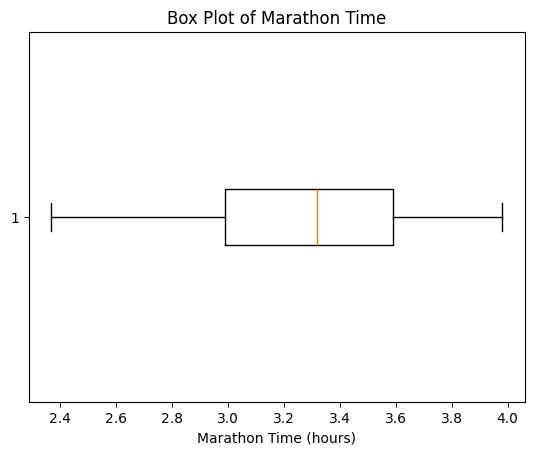

In [65]:
# Create a box plot to visually detect outliers
plt.boxplot(df_marathon['MarathonTime'], vert=False)
plt.title("Box Plot of Marathon Time")
plt.xlabel("Marathon Time (hours)")
plt.show()

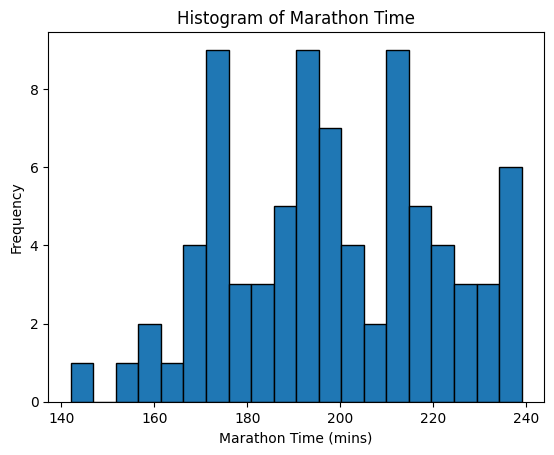

In [66]:
# Create a histogram
plt.hist(df_marathon['MarathonTime_mins'], bins=20, edgecolor='black')
plt.title("Histogram of Marathon Time")
plt.xlabel("Marathon Time (mins)")
plt.ylabel("Frequency")
plt.show() 

**Wall21**

We can introduce a new column Wall 21 Ratio (based on the Ideal Marathon Time)

This new column is to represent how evenly a runner splits their first and second halves of a marathon

In [67]:
# Convert Wall21 to total minutes
converted_wall21_minutes = []
for time in df_marathon['Wall21'].dropna():
    h = int(time)  # Extract integer hours
    mins = round((time - h) * 60)  # Convert fractional hours to minutes
    converted_wall21_minutes.append(h * 60 + mins)  # Total minutes

# Calculate ideal marathon times in total minutes (Wall21 * 2)
df_marathon['Ideal Marathon Time_mins'] = df_marathon['Wall21'] * 2 * 60

# Add the total minutes back to the DataFrame (aligning indexes)
df_marathon['Wall21_total_minutes'] = pd.Series(converted_wall21_minutes).reindex(df_marathon.index, fill_value=np.nan)

df_marathon.sample(10)

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY,MaxGroupAge,MarathonTime_mins,Ideal Marathon Time_mins,Wall21_total_minutes
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,nocrosstr,1.16,2.37,A,40,142,139.2,70.0
70,71,Prague17,Roy Bruhn,M45,87.0,11.472527,nocrosstr,1.81,3.68,D,50,221,217.2,111.0
52,53,Prague17,Luk ? Charv t,M40,121.7,9.907734,nocrosstr,1.65,3.46,C,45,208,198.0,103.0
18,19,Prague17,Jan Fri?ek,MAM,84.5,12.549505,nocrosstr,1.45,2.93,A,40,176,174.0,87.0
60,61,Prague17,Szigyarto Laszlo,M40,43.2,10.936709,nocrosstr,1.76,3.55,C,45,213,211.2,101.0
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,nocrosstr,1.30,2.66,A,40,160,156.0,78.0
47,48,Prague17,Miguel Escribano,M45,39.6,12.247423,nocrosstr,1.67,3.35,B,50,201,200.4,98.0
10,11,Prague17,Maksim Remezau,MAM,93.5,13.200000,nocrosstr,1.42,2.87,A,40,172,170.4,85.0
15,16,Prague17,David Lehnen,MAM,76.1,14.970492,nocrosstr,1.45,2.90,A,40,174,174.0,87.0
14,15,Prague17,Denis Wachtl,MAM,76.8,12.943820,nocrosstr,1.44,2.89,A,40,173,172.8,86.0


In [68]:
# Calculate Wall21 Ratio

# Calculate the Second Half Time
df_marathon['Second Half Time'] = df_marathon['MarathonTime'] - df_marathon['Wall21']

# Calculate the Wall21 Ratio
df_marathon['Wall21 Ratio'] = df_marathon['Second Half Time'] / df_marathon['Wall21']


print(df_marathon[['Wall21', 'MarathonTime', 'Second Half Time', 'Wall21 Ratio']])

    Wall21  MarathonTime  Second Half Time  Wall21 Ratio
0     1.16          2.37              1.21      1.043103
1     1.23          2.59              1.36      1.105691
2     1.30          2.66              1.36      1.046154
3     1.32          2.68              1.36      1.030303
4     1.36          2.74              1.38      1.014706
..     ...           ...               ...           ...
82    2.02          3.93              1.91      0.945545
83    1.94          3.93              1.99      1.025773
84    1.94          3.94              2.00      1.030928
85    2.05          3.95              1.90      0.926829
86    2.05          3.98              1.93      0.941463

[81 rows x 4 columns]


**Wall21 Ratio Outliers**

If a marathoner runs the first and second halves at the same pace, the ideal ratio (Wall21) is **1.00**.

-	For example:

-	First half: 1:30:00 (1.5 hours).

-	Second half: 1:30:00 (1.5 hours).

-	Total time: 3:00:00.

Ratios above 1.00 indicate that the runner slowed down in the second half, suggesting fatigue or hitting “the wall.” Ratios below 1.00 are uncommon and suggest the runner ran the second half faster than the first, which is rare in marathon pacing.

**Range of Values**:

•	Ratios should logically be **≥ 1.00**, as slowing down in the second half is typical.

•	Values like **1.16** are plausible and indicate a well-paced run.

•	High values (e.g., **2.05**) suggest a significant slowdown.

In [69]:
# Calculate the IQR for Wall21 Ratio
Q1 = df_marathon['Wall21 Ratio'].quantile(0.25)
Q3 = df_marathon['Wall21 Ratio'].quantile(0.75)
IQR = Q3 - Q1

# Calculate outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_marathon[(df_marathon['Wall21 Ratio'] < lower_bound) | (df_marathon['Wall21 Ratio'] > upper_bound)]

# Display results
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
print("Outliers:")
print(outliers)

Lower bound: 0.8792607093505302, Upper bound: 1.1852640872101947
Outliers:
    id  Marathon               Name Category  km4week    sp4week  \
42  43  Prague17  Thanasis Kypraios      MAM     82.7  11.647887   

   CrossTraining  Wall21  MarathonTime CATEGORY  MaxGroupAge  \
42     nocrosstr    1.78          3.32        B           40   

    MarathonTime_mins  Ideal Marathon Time_mins  Wall21_total_minutes  \
42                199                     213.6                 100.0   

    Second Half Time  Wall21 Ratio  
42              1.54      0.865169  


Expected range for the Wall21 Ratio based on the IQR method is from 0.879 to 1.185. The Outlier is the runner with Id = 43. Possible Explanations:

    1.  Pacing Strategy:
    -   The runner may have intentionally started slow to conserve energy for the second half.
    2.  Training Effect:
    -   High mileage (km4week = 82.7 km) and a decent pace (5.15 min/km) might indicate strong endurance.
    3.  Data Error

**sp4week**

The sp4week column appears to represent a measure of speed, but its values don’t match the common unit of minutes per kilometer. Instead, these values seem more aligned with kilometers per hour (km/h), where higher values indicate faster speeds.

I'll convert it to pace (min/km) because it is the most common way of measuring the speed between the runners of all levels.


In [70]:
# Convert sp4week (km/h) to pace (min/km)
df_marathon['Pace4week (min/km)'] = 60 / df_marathon['sp4week']

df_marathon

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY,MaxGroupAge,MarathonTime_mins,Ideal Marathon Time_mins,Wall21_total_minutes,Second Half Time,Wall21 Ratio,Pace4week (min/km)
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,nocrosstr,1.16,2.37,A,40,142,139.2,70.0,1.21,1.043103,4.156627
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,nocrosstr,1.23,2.59,A,40,155,147.6,74.0,1.36,1.105691,4.387755
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,nocrosstr,1.30,2.66,A,40,160,156.0,78.0,1.36,1.046154,4.437727
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,nocrosstr,1.32,2.68,A,50,161,158.4,79.0,1.36,1.030303,4.894545
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,nocrosstr,1.36,2.74,A,40,164,163.2,82.0,1.38,1.014706,4.302600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,83,Prague17,Stefano Vegliani,M55,50.0,10.830325,nocrosstr,2.02,3.93,D,60,236,242.4,NaN,1.91,0.945545,5.540000
83,84,Prague17,Andrej Madliak,M40,33.6,10.130653,ciclista 3h,1.94,3.93,D,45,236,232.8,NaN,1.99,1.025773,5.922619
84,85,Prague17,Yoi Ohsako,M40,55.4,11.043189,nocrosstr,1.94,3.94,D,45,236,232.8,NaN,2.00,1.030928,5.433213
85,86,Prague17,Simon Dunn,M45,33.2,11.066667,nocrosstr,2.05,3.95,D,50,237,246.0,NaN,1.90,0.926829,5.421687


**sp4week Outliers**

In [72]:
# Calculate Q1, Q3, and IQR for the 'sp4week' column
Q1 = df_marathon['sp4week'].quantile(0.25)
Q3 = df_marathon['sp4week'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_marathon[(df_marathon['sp4week'] < lower_bound) | (df_marathon['sp4week'] > upper_bound)]

# Print the outliers
print("Outliers in sp4week:")
print(outliers)


Outliers in sp4week:
    id  Marathon             Name Category  km4week       sp4week  \
15  16  Prague17     David Lehnen      MAM     76.1     14.970492   
19  20  Prague17  Vlastimil Lys k      MAM     76.7      8.031414   
76  77  Prague17    Michal Karhan      MAM     40.3      8.337931   
81  82  Prague17      Nathan Khan      MAM     35.6  11125.000000   

   CrossTraining  Wall21  MarathonTime CATEGORY  MaxGroupAge  \
15     nocrosstr    1.45          2.90        A           40   
19     nocrosstr    1.41          2.94        A           40   
76   ciclista 5h    1.94          3.80        D           40   
81     nocrosstr    2.05          3.92        D           40   

    MarathonTime_mins  Ideal Marathon Time_mins  Wall21_total_minutes  \
15                174                     174.0                  87.0   
19                176                     169.2                  85.0   
76                228                     232.8                 121.0   
81                23

Unusually High Speed (Outlier at Index 81)

	•	Runner: Nathan Khan
	•	Speed: 11125 km/h
	•	Pace: 0.005 min/km (unrealistically fast).
	•	This is likely a data entry error 

In [74]:
# Remove the outlier with 11125 km/h in the 'sp4week' column
df_marathon = df_marathon[df_marathon['sp4week'] != 11125]

print("Outlier with 11125 km/h removed:", 11125 not in df_marathon['sp4week'].values)

Outlier with 11125 km/h removed: True


**km4week Outliers**

In [75]:
# Calculate Q1, Q3, and IQR for the 'km4week' column
Q1 = df_marathon['km4week'].quantile(0.25)
Q3 = df_marathon['km4week'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_km4week = df_marathon[(df_marathon['km4week'] < lower_bound) | (df_marathon['km4week'] > upper_bound)]

# Print outlier bounds and the outliers
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print("Outliers in km4week:")
print(outliers_km4week)

Lower Bound: 1.437499999999993, Upper Bound: 124.73750000000001
Outliers in km4week:
    id  Marathon           Name Category  km4week    sp4week CrossTraining  \
0    1  Prague17   Blair MORGAN      MAM    132.8  14.434783     nocrosstr   
3    4  Prague17  Daniel Or lek      M45    137.5  12.258544     nocrosstr   
26  27  Prague17    Cat Simpson      WAM    129.6  12.188088     nocrosstr   

    Wall21  MarathonTime CATEGORY  MaxGroupAge  MarathonTime_mins  \
0     1.16          2.37        A           40                142   
3     1.32          2.68        A           50                161   
26    1.54          3.12        B           40                187   

    Ideal Marathon Time_mins  Wall21_total_minutes  Second Half Time  \
0                      139.2                  70.0              1.21   
3                      158.4                  79.0              1.36   
26                     184.8                  91.0              1.58   

    Wall21 Ratio  Pace4week (min/km)

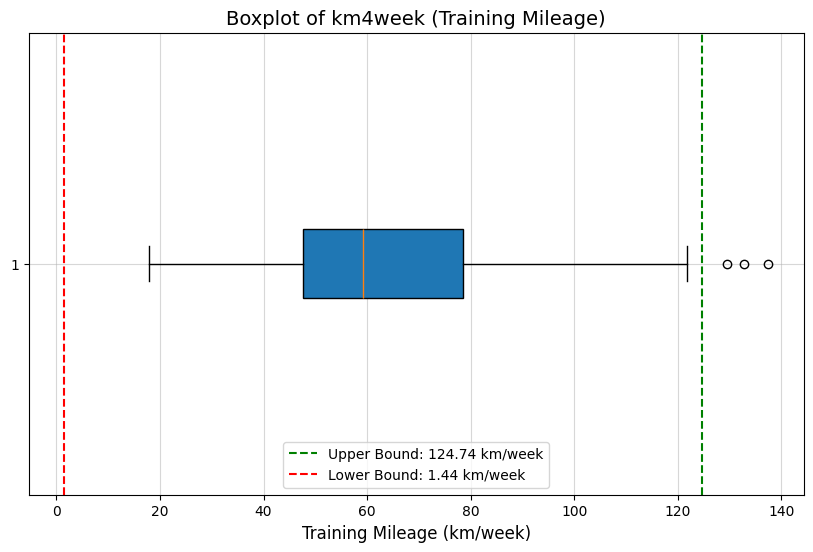

In [76]:
# Visualization: Boxplot to highlight outliers in 'km4week'
plt.figure(figsize=(10, 6))
plt.boxplot(df_marathon['km4week'], vert=False, patch_artist=True)
plt.title("Boxplot of km4week (Training Mileage)", fontsize=14)
plt.xlabel("Training Mileage (km/week)", fontsize=12)
plt.grid(alpha=0.5)

# Highlight bounds on the plot
plt.axvline(x=124.7375, color='green', linestyle='--', label="Upper Bound: 124.74 km/week")
plt.axvline(x=1.4375, color='red', linestyle='--', label="Lower Bound: 1.44 km/week")
plt.legend(fontsize=10)

plt.show()

Based on their Marathon Time and Wall21 it seems like these 3 outliers might be well trained athletes and don't represent data error. 

In [78]:
# Save the DataFrame to the 'data' folder
df_marathon.to_csv('./data/modified_dataset_v4.csv', index=False)


## 5. Analysis

### Univariate Analysis (Numerical variables)

In [79]:
df_marathon.head(2)

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY,MaxGroupAge,MarathonTime_mins,Ideal Marathon Time_mins,Wall21_total_minutes,Second Half Time,Wall21 Ratio,Pace4week (min/km)
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,nocrosstr,1.16,2.37,A,40,142,139.2,70.0,1.21,1.043103,4.156627
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,nocrosstr,1.23,2.59,A,40,155,147.6,74.0,1.36,1.105691,4.387755


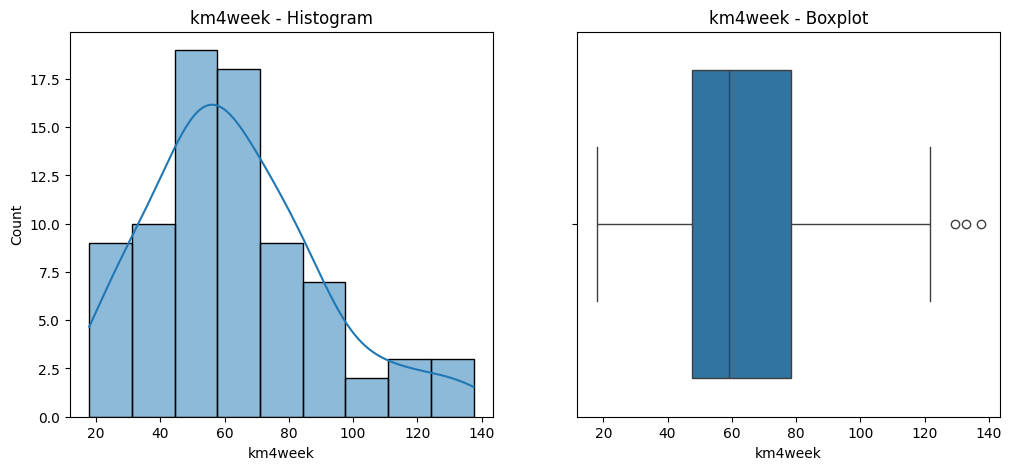

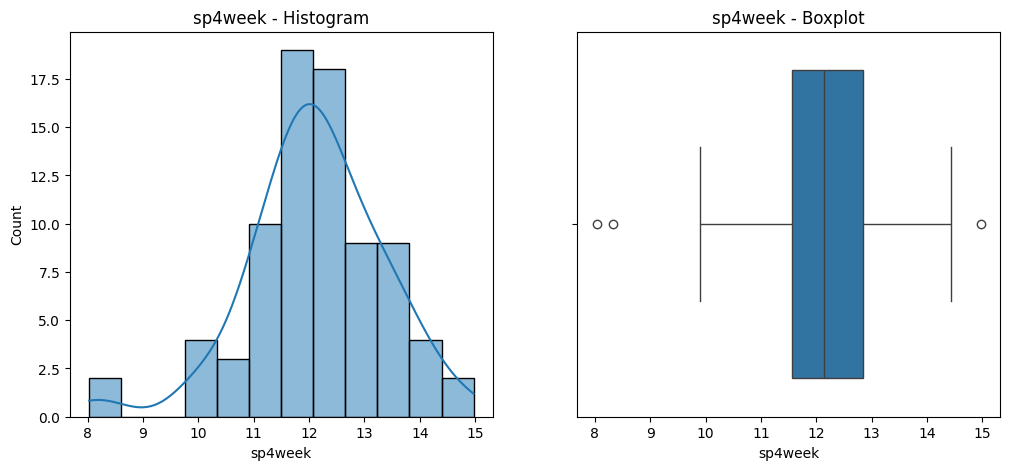

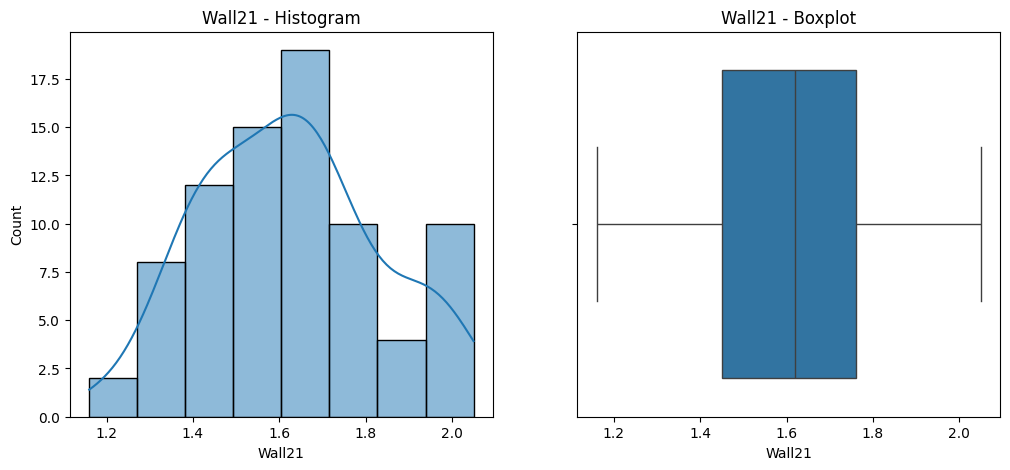

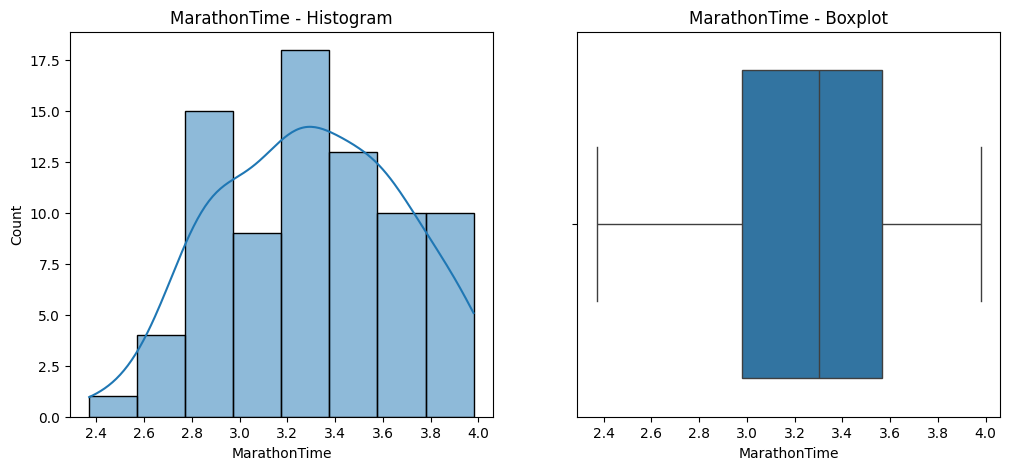

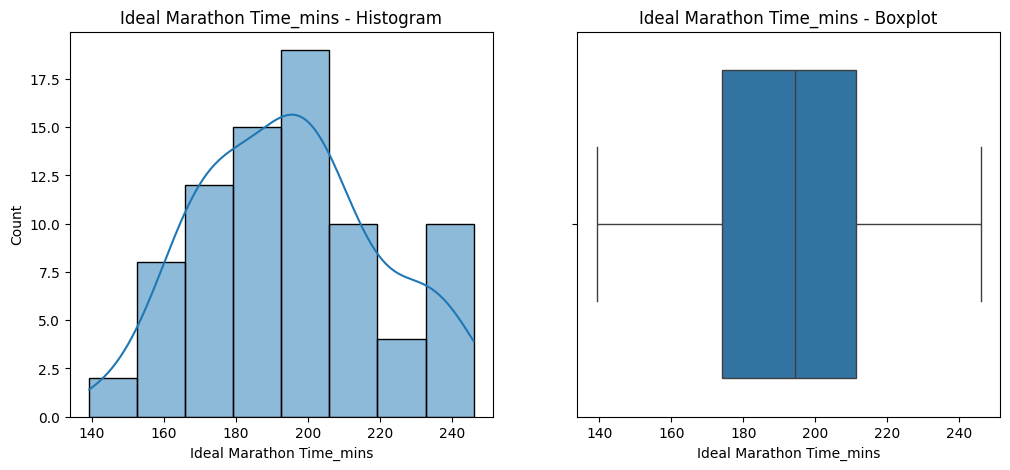

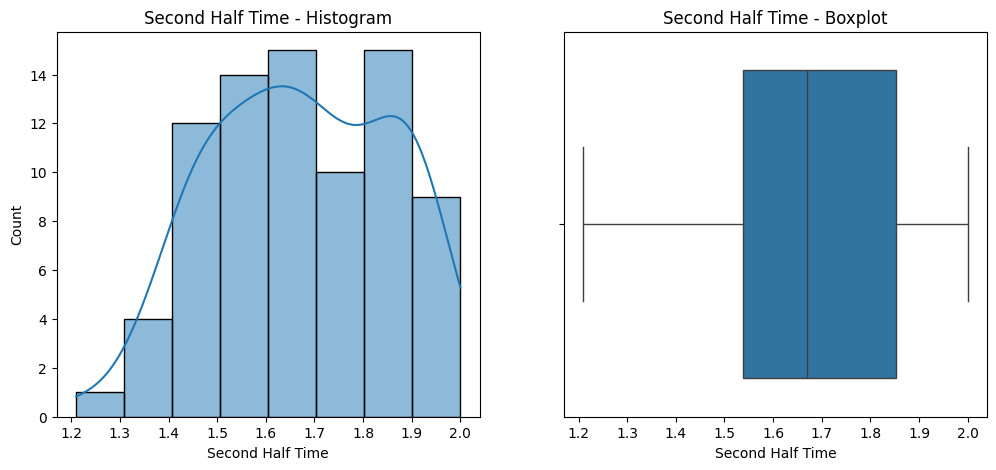

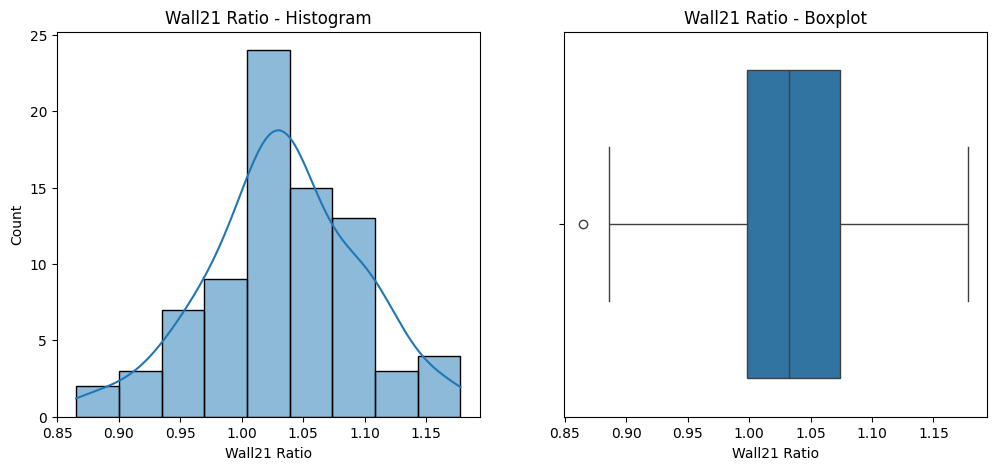

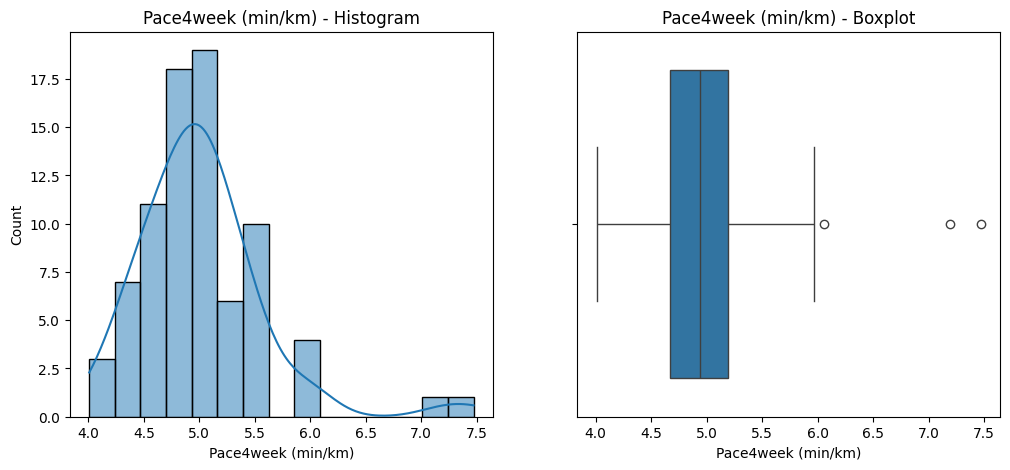

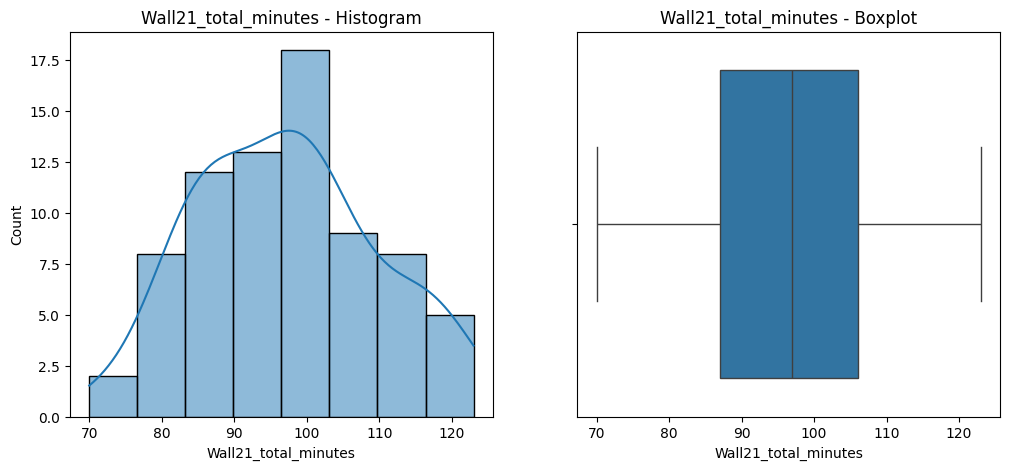

,id,km4week,sp4week,Wall21,MarathonTime,MaxGroupAge,MarathonTime_mins,Ideal Marathon Time_mins,Wall21_total_minutes,Second Half Time,Wall21 Ratio,Pace4week (min/km)
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,75.000000,80.000000,80.000000,80.000000
mean,42.800000,62.988750,12.109312,1.625375,3.299250,44.312500,197.925000,195.045000,97.240000,1.673875,1.033679,5.010172
std,25.275895,26.839815,1.221275,0.206428,0.376677,5.611006,22.595382,24.771359,12.480081,0.183968,0.062741,0.566828
min,1.000000,17.900000,8.031414,1.160000,2.370000,40.000000,142.000000,139.200000,70.000000,1.210000,0.865169,4.007884
25%,20.750000,47.675000,11.555808,1.450000,2.977500,40.000000,178.250000,174.000000,87.000000,1.537500,0.998503,4.672341
50%,42.500000,59.250000,12.145932,1.620000,3.300000,40.000000,198.000000,194.400000,97.000000,1.670000,1.032397,4.939936
75%,64.250000,78.500000,12.841563,1.760000,3.567500,50.000000,214.250000,211.200000,106.000000,1.852500,1.074161,5.192208
max,87.000000,137.500000,14.970492,2.050000,3.980000,60.000000,239.000000,246.000000,123.000000,2.000000,1.177914,7.470665


In [80]:
numerical_columns = ['km4week', 'sp4week', 'Wall21', 'MarathonTime', 'Ideal Marathon Time_mins',
                     'Second Half Time', 'Wall21 Ratio', 'Pace4week (min/km)', 'Wall21_total_minutes']

univariate_stats = df_marathon[numerical_columns].describe()

# Plot histograms and boxplots for numerical variables
for column in numerical_columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    sns.histplot(df_marathon[column], kde=True, ax=axes[0])
    axes[0].set_title(f'{column} - Histogram')

    sns.boxplot(x=df_marathon[column], ax=axes[1])
    axes[1].set_title(f'{column} - Boxplot')
    plt.show()

# Display the descriptive statistics
univariate_stats = df_marathon.describe()
display(univariate_stats)

**Key Insights from Univariate Analysis (Numerical variables)**

**km4week:**
The distribution shows a slight positive skew, indicating some outliers who run significantly higher weekly distances.

**sp4week:**
The distribution is fairly symmetric, suggesting that speed training is quite uniform across participants.

**Wall21:**
Some participants may struggle to maintain pace beyond the first half, as reflected in the upper range.

**Marathon Time:**

The histogram shows most participants finishing marathons between 3 to 3.5 hours.


The MarathonTime and Ideal Marathon Time are close, suggesting participants train to align with their goals.

	•	Wall21 and Second Half Time show that maintaining pace after 21 km is challenging for many participants.
	•	The variability in km4week and sp4week indicates different training regimens, potentially explaining performance differences.
	•	Pace4week and MarathonTime could be explored further in bivariate analysis to identify correlations between weekly pace and marathon performance.


### Univariate Analysis (Categorical variables)

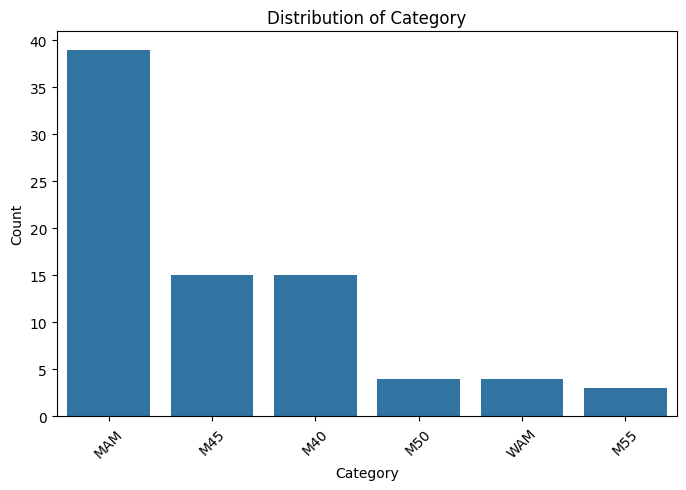

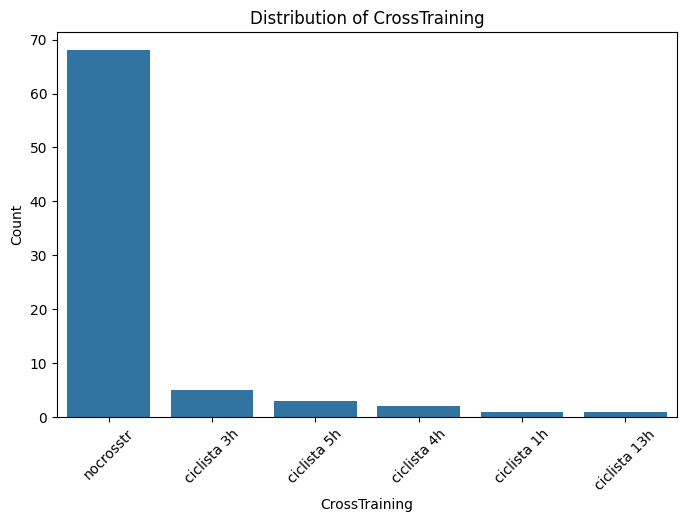

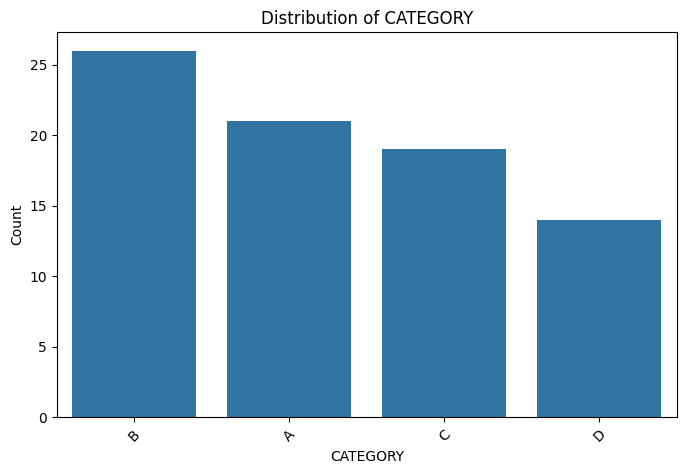

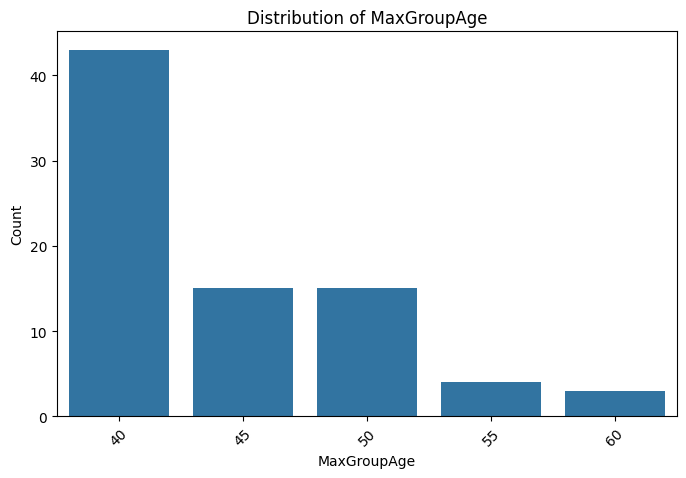

{'Category': Category
 MAM    39
 M45    15
 M40    15
 M50     4
 WAM     4
 M55     3
 Name: count, dtype: int64,
 'CrossTraining': CrossTraining
 nocrosstr       68
 ciclista 3h      5
 ciclista 5h      3
 ciclista 4h      2
 ciclista 1h      1
 ciclista 13h     1
 Name: count, dtype: int64,
 'CATEGORY': CATEGORY
 B    26
 A    21
 C    19
 D    14
 Name: count, dtype: int64,
 'MaxGroupAge': MaxGroupAge
 40    43
 50    15
 45    15
 55     4
 60     3
 Name: count, dtype: int64}

In [81]:
# Univariate analysis for categorical variables
categorical_columns = ['Category', 'CrossTraining', 'CATEGORY', 'MaxGroupAge']

# Frequency counts and bar plots for categorical variables
categorical_summary = {}

for column in categorical_columns:
    count_data = df_marathon[column].value_counts()
    categorical_summary[column] = count_data
    
    # Plot the bar chart
    plt.figure(figsize=(8, 5))
    sns.barplot(x=count_data.index, y=count_data.values)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

categorical_summary

**Insights from Univariate Analysis of Categorical Variables:**

- The vast majority (68 runners) have no cross-training
- Categories (CATEGORY) are evenly distributed with slight variation
- The majority of runners fall into the 40 age group 

### Bivariate Analysis

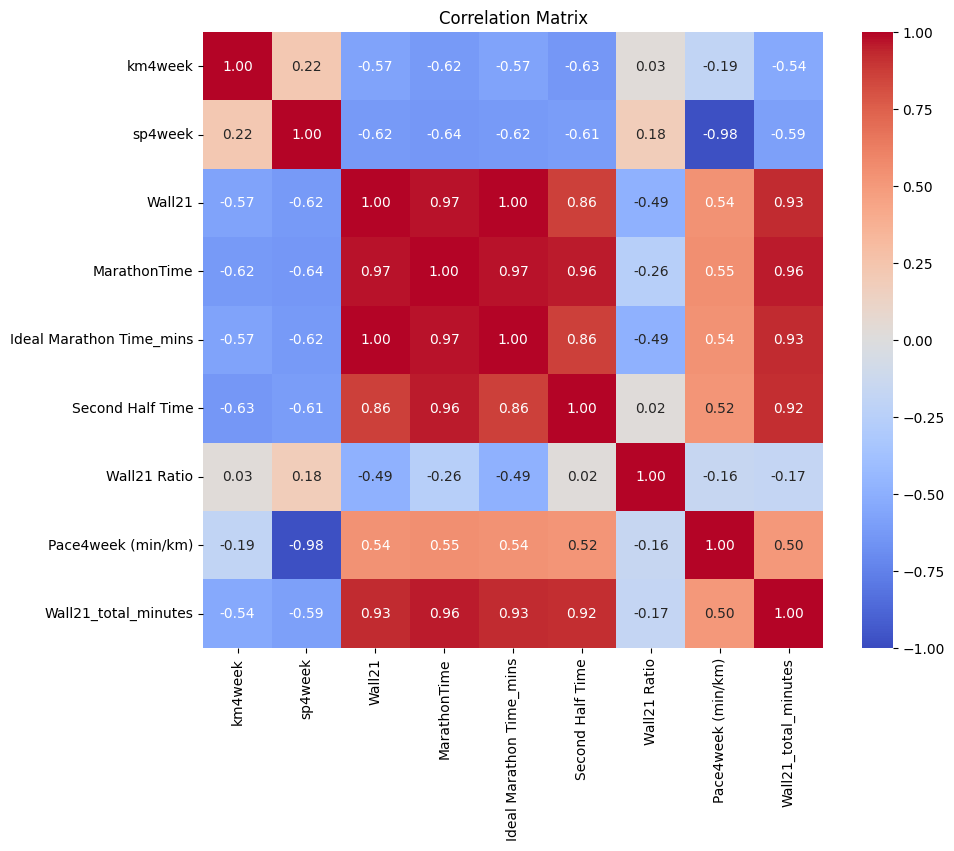

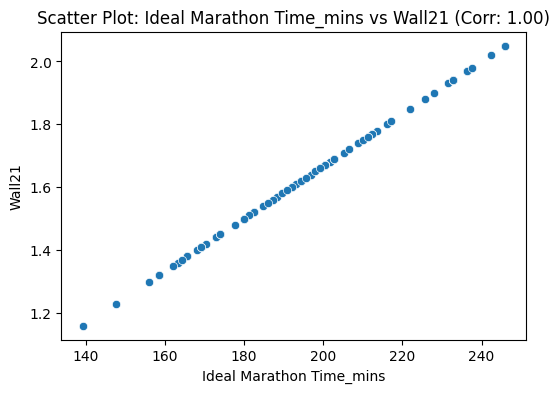

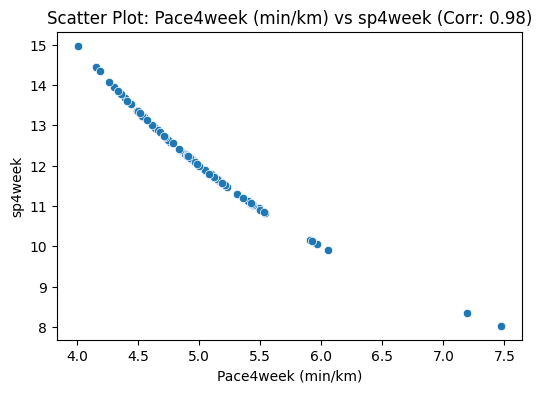

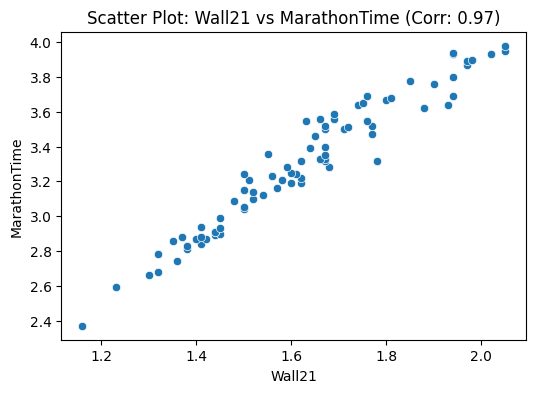

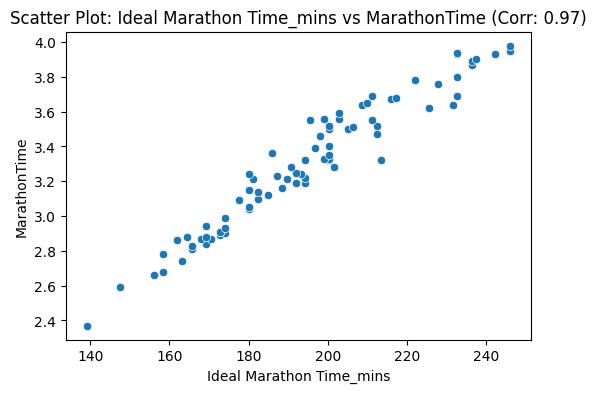

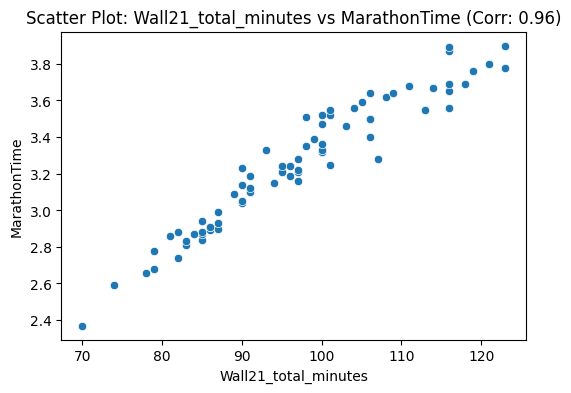

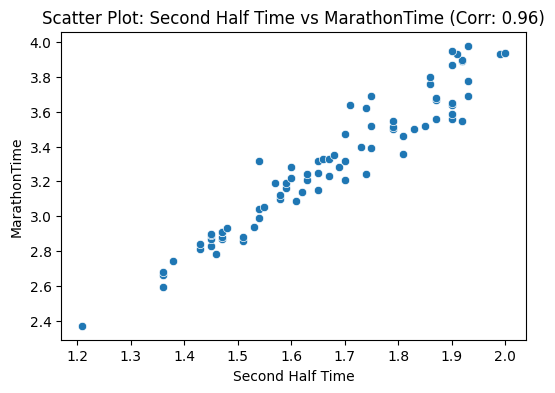

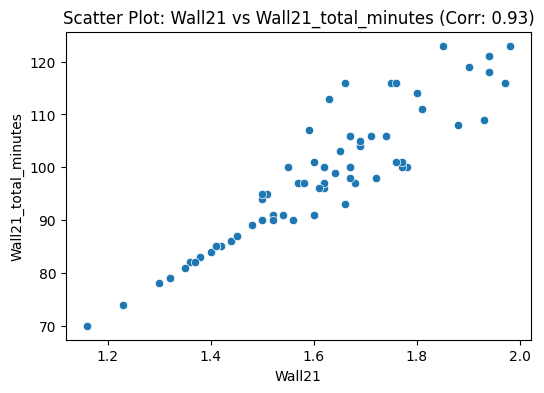

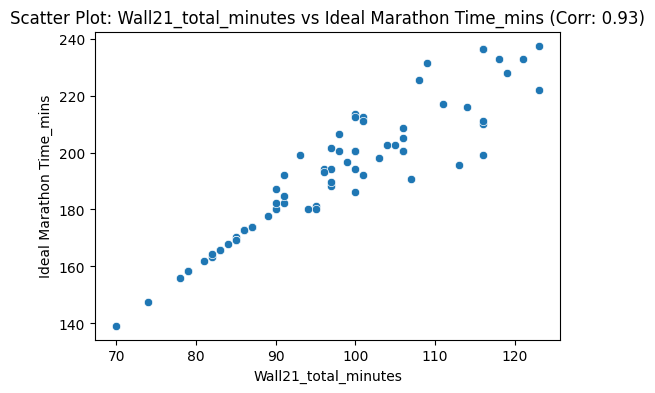

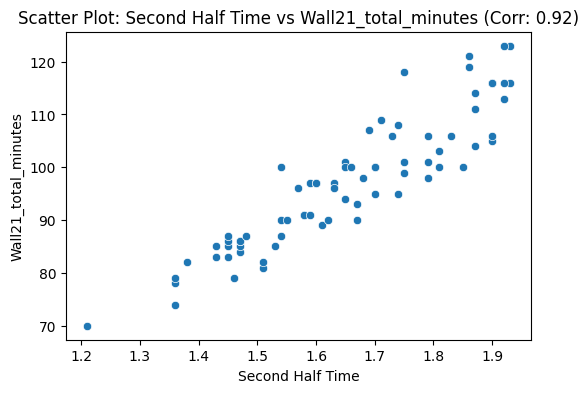

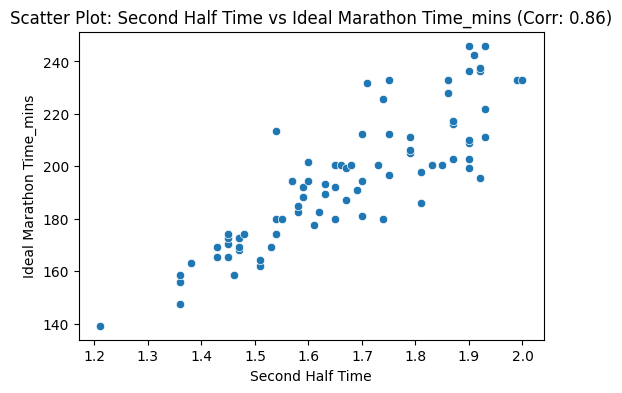

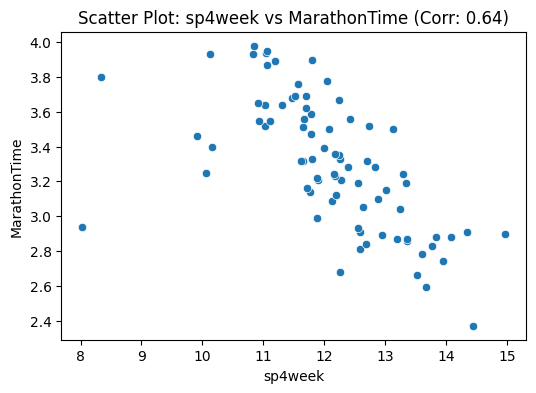

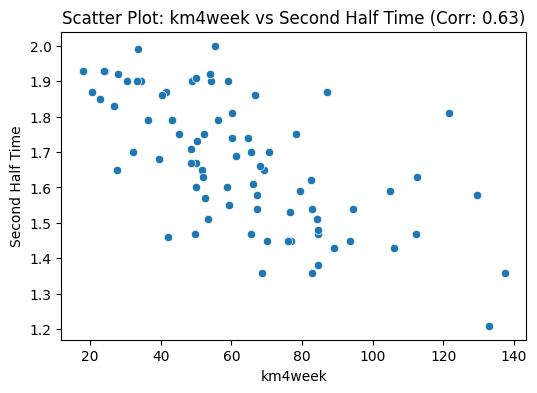

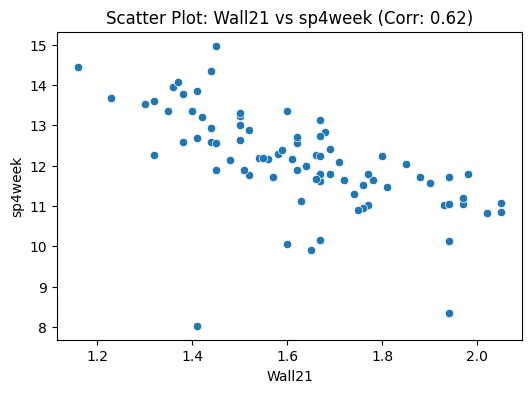

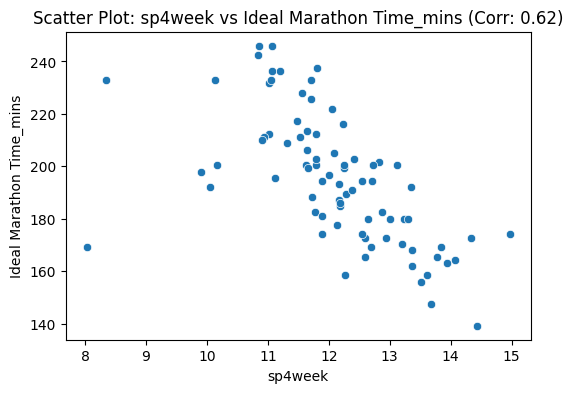

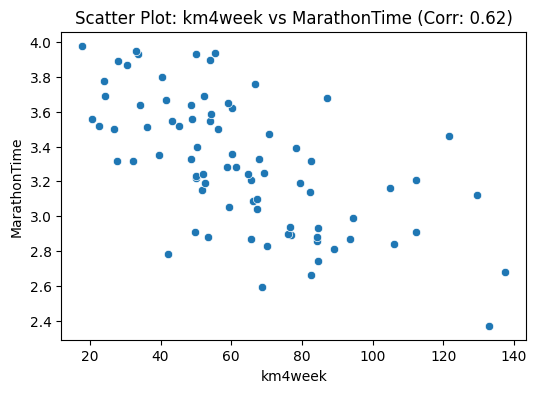

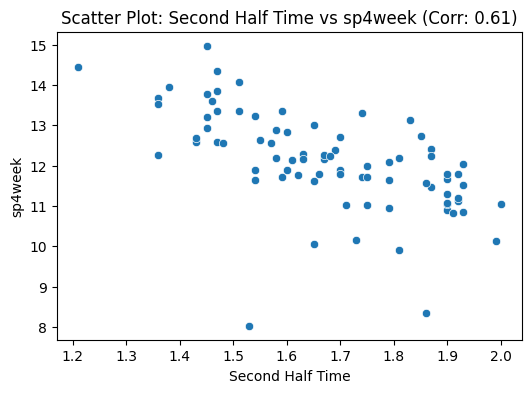

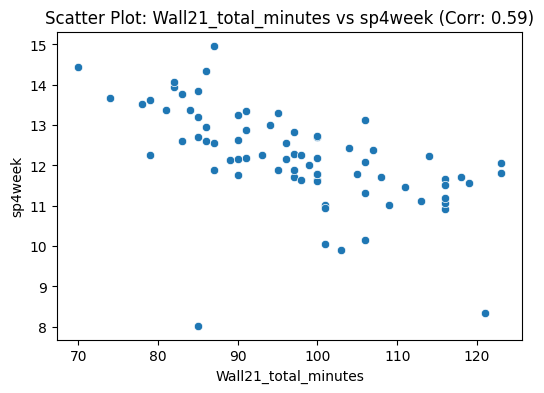

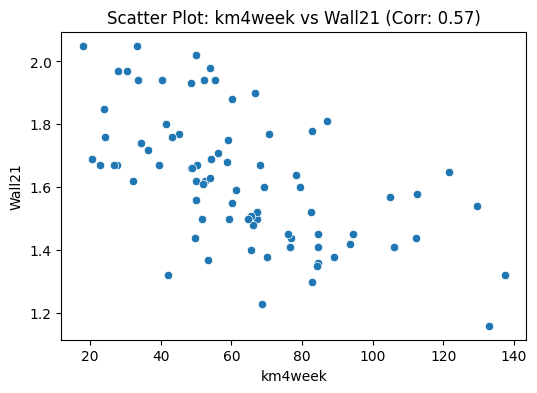

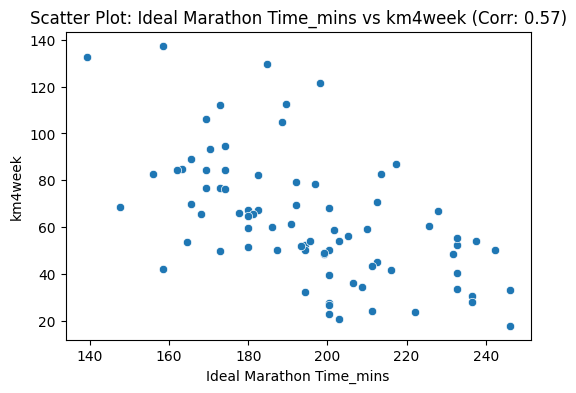

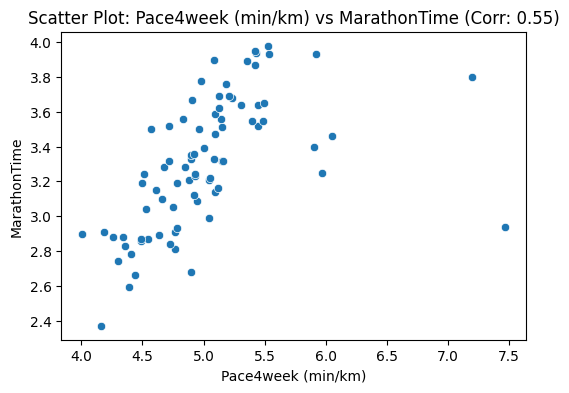

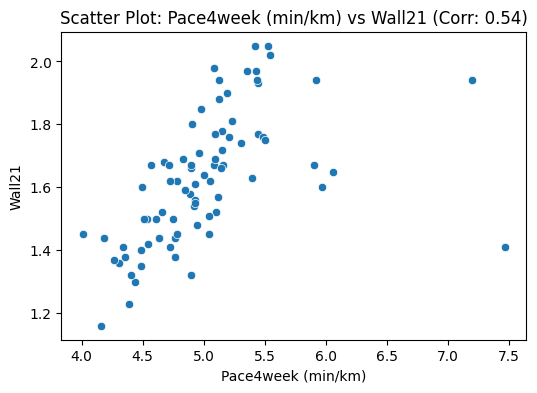

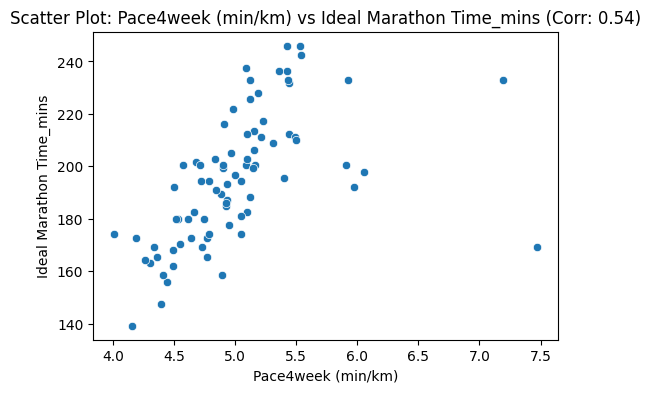

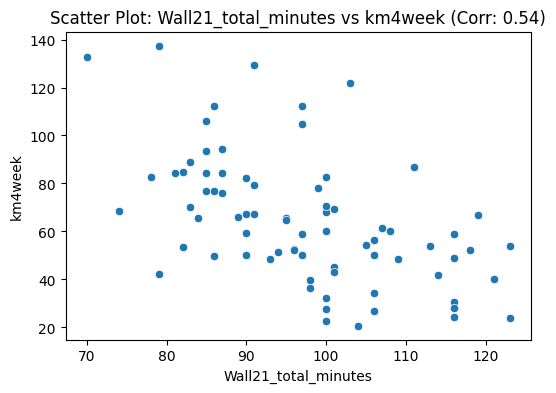

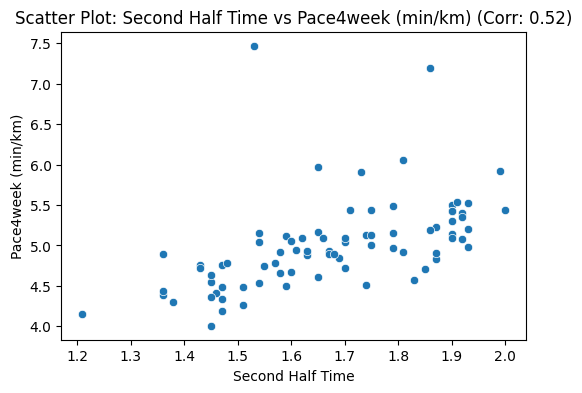

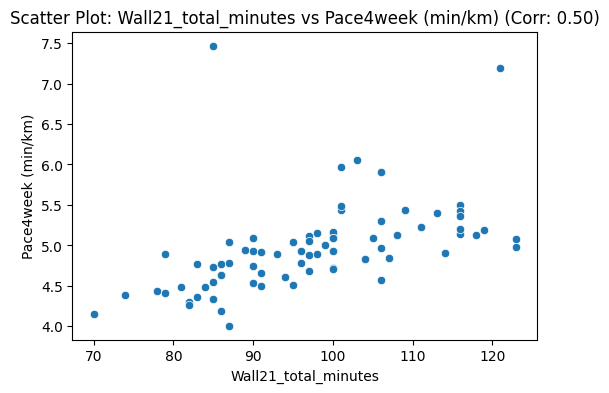

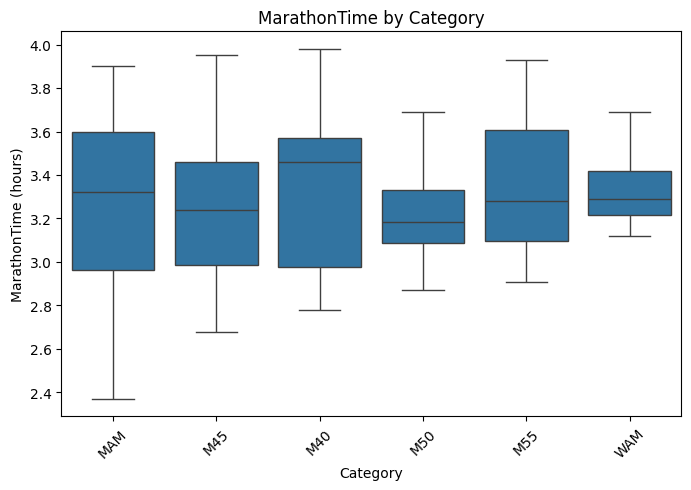

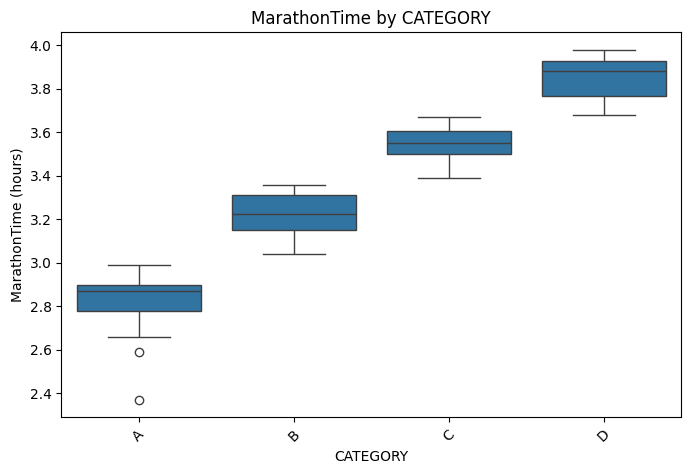

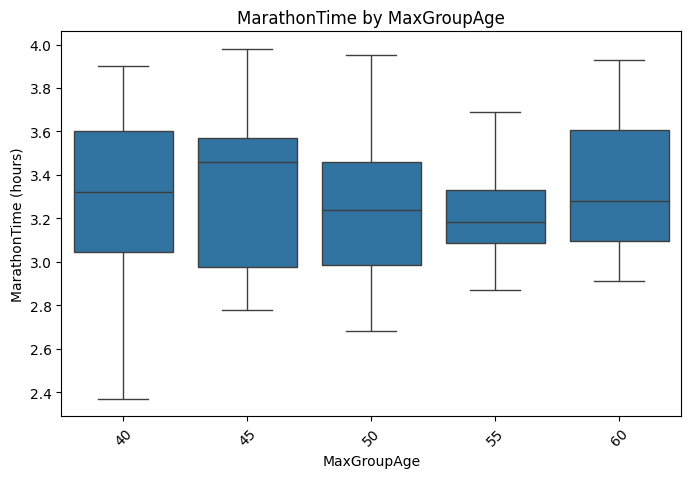

In [82]:
# Correlation matrix for numerical variables
corr_matrix = df_marathon[numerical_columns].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

# Scatter plots for strongly correlated pairs (|corr| > 0.5)
strong_corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)
strong_corr_pairs = strong_corr_pairs[strong_corr_pairs < 1].drop_duplicates()
strong_pairs = strong_corr_pairs[strong_corr_pairs > 0.5]

# Plot scatter plots for strong correlations
for (var1, var2), corr_value in strong_pairs.items():
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df_marathon, x=var1, y=var2)
    plt.title(f"Scatter Plot: {var1} vs {var2} (Corr: {corr_value:.2f})")
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()

# Categorical vs Numerical: Boxplots for MarathonTime by Category, CATEGORY, and MaxGroupAge
categorical_vs_numerical = ['Category', 'CATEGORY', 'MaxGroupAge']

for cat_col in categorical_vs_numerical:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_marathon, x=cat_col, y='MarathonTime')
    plt.title(f"MarathonTime by {cat_col}")
    plt.xlabel(cat_col)
    plt.ylabel("MarathonTime (hours)")
    plt.xticks(rotation=45)
    plt.show()

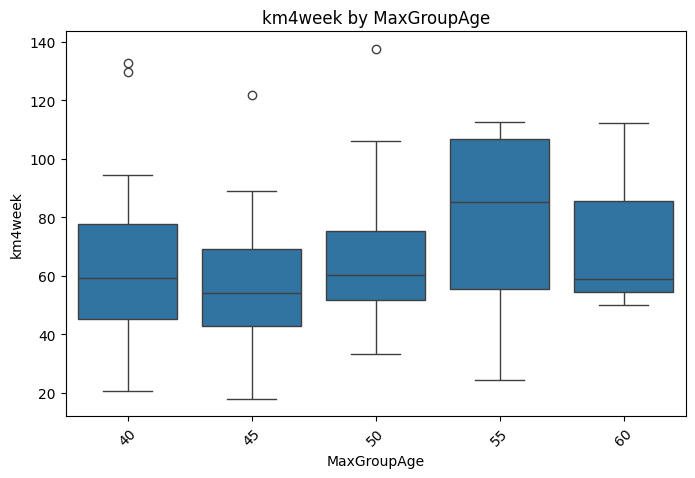

In [83]:
# Box plot for km4week by MaxGroupAge
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_marathon, x='MaxGroupAge', y='km4week')
plt.title("km4week by MaxGroupAge")
plt.xlabel("MaxGroupAge")
plt.ylabel("km4week")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

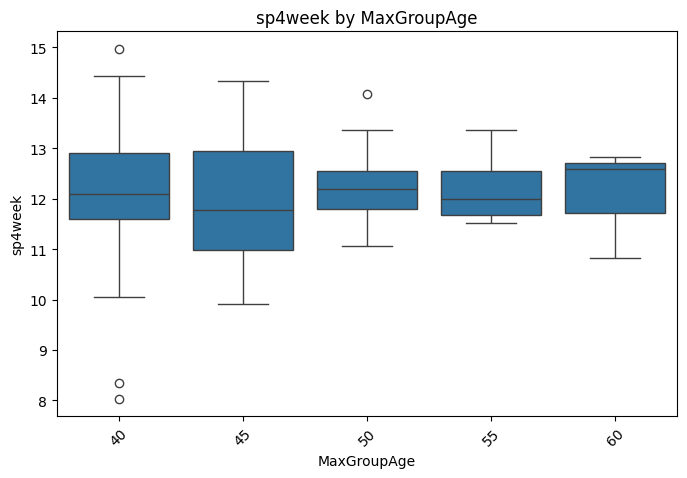

In [89]:

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_marathon, x='MaxGroupAge', y='sp4week')
plt.title("sp4week by MaxGroupAge")
plt.xlabel("MaxGroupAge")
plt.ylabel("sp4week")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

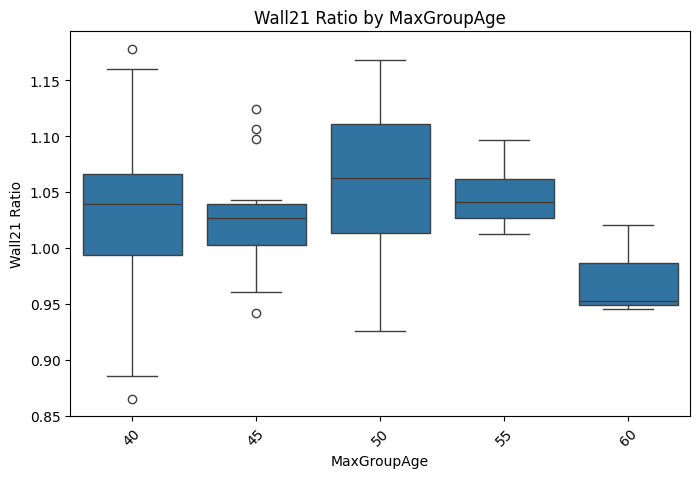

In [88]:

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_marathon, x='MaxGroupAge', y='Wall21 Ratio')
plt.title("Wall21 Ratio by MaxGroupAge")
plt.xlabel("MaxGroupAge")
plt.ylabel("Wall21 Ratio")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

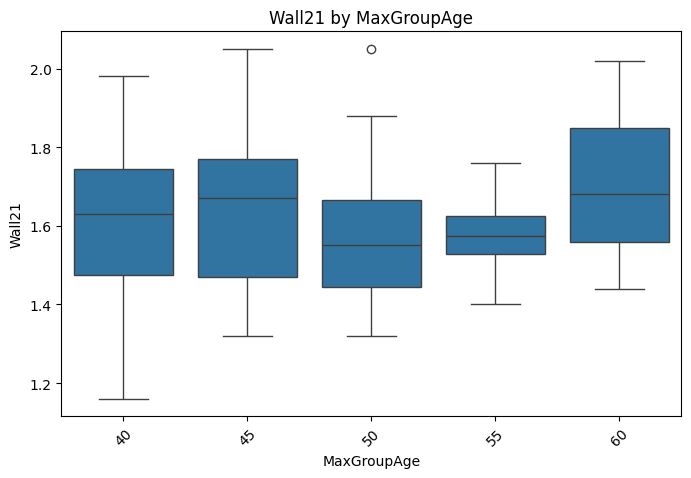

In [87]:

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_marathon, x='MaxGroupAge', y='Wall21')
plt.title("Wall21 by MaxGroupAge")
plt.xlabel("MaxGroupAge")
plt.ylabel("Wall21")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

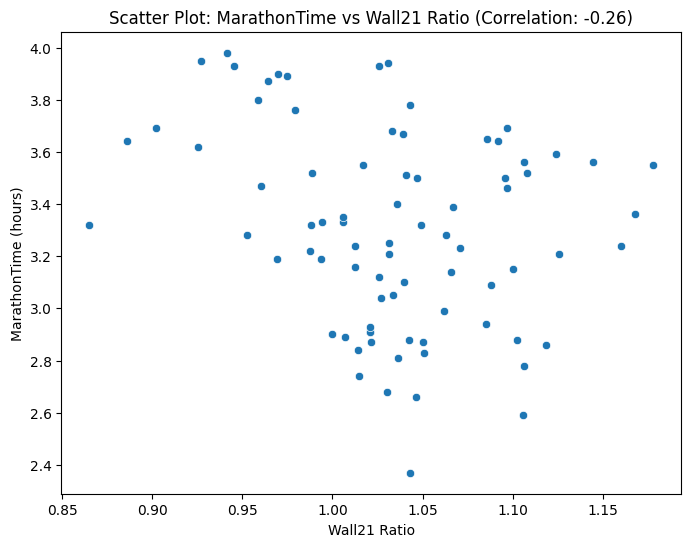

np.float64(-0.2577420112181378)

In [90]:
# Calculate the correlation between MarathonTime and Wall21 Ratio
correlation = df_marathon['MarathonTime'].corr(df_marathon['Wall21 Ratio'])

# Scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_marathon, x='Wall21 Ratio', y='MarathonTime')
plt.title(f"Scatter Plot: MarathonTime vs Wall21 Ratio (Correlation: {correlation:.2f})")
plt.xlabel("Wall21 Ratio")
plt.ylabel("MarathonTime (hours)")
plt.show()

correlation

**Insights from Bivariate Analysis:**

Numerical Variables: Correlations

•	km4week vs MarathonTime: Strong negative correlation (~-0.65).

Runners who train more kilometers per week tend to have faster marathon times.

•	sp4week vs MarathonTime: Strong negative correlation (~-0.68).

Higher weekly training speeds correlate strongly with faster marathon times.

•	Wall21 vs MarathonTime: Strong positive correlation (~0.76).

Higher “Wall21” values (indicative of slower 21km times) are associated with slower overall marathon times.

•	Second Half Time vs MarathonTime: Very strong positive correlation (~0.95).

Marathon time is largely determined by second-half performance, indicating pace maintenance is crucial.

- The correlation between MarathonTime and Wall21 Ratio is -0.26, which indicates a weak negative relationship. A lower Wall21 Ratio (indicating a more balanced performance between the first and second half of the marathon) is slightly associated with a shorter marathon time. Runners with a higher Wall21 Ratio (suggesting slower second-half performance relative to the first half) tend to have longer marathon times. This suggests other factors, like weekly training or speed, might play a more significant role in marathon performance.

**Insights Categorical Variables vs MarathonTime**

- Runners in younger or middle-aged male categories outperform others.

- Although most runners do not perform cross-training, those who engage in 3–5 hours of cycling seem to have slightly better marathon times on average.

- Performance deteriorates significantly in the second half of the marathon for slower runners.

- Cross-training may offer slight performance benefits, but most runners do not use it.

- Age group is important predictors of performance.

- Weekly distance and speed have a strong negative relationship with marathon time. (The more kilometers you run each week and the faster your running speed during training, the faster you are likely to finish the marathon.)





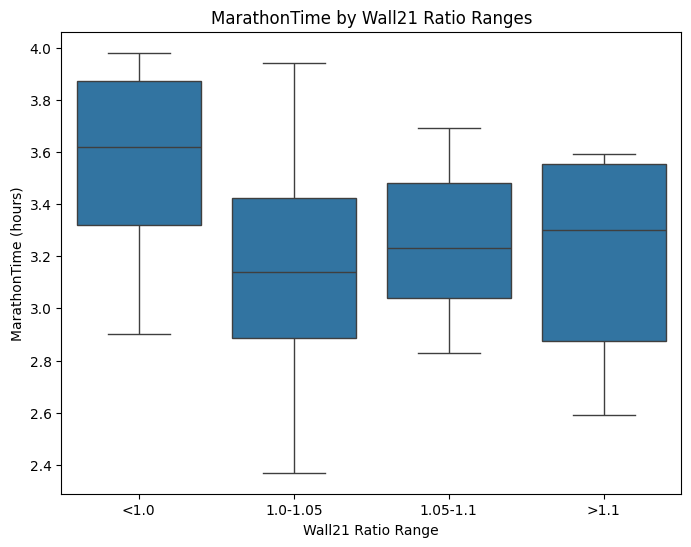

In [91]:
# Create Wall21 Ratio bins for segmentation
df_marathon['Wall21_Ratio_Range'] = pd.cut(df_marathon['Wall21 Ratio'], bins=[0.85, 1.0, 1.05, 1.1, 1.2], labels=['<1.0', '1.0-1.05', '1.05-1.1', '>1.1'])



# Boxplot of MarathonTime across Wall21 Ratio bins
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_marathon, x='Wall21_Ratio_Range', y='MarathonTime')
plt.title("MarathonTime by Wall21 Ratio Ranges")
plt.xlabel("Wall21 Ratio Range")
plt.ylabel("MarathonTime (hours)")
plt.show()


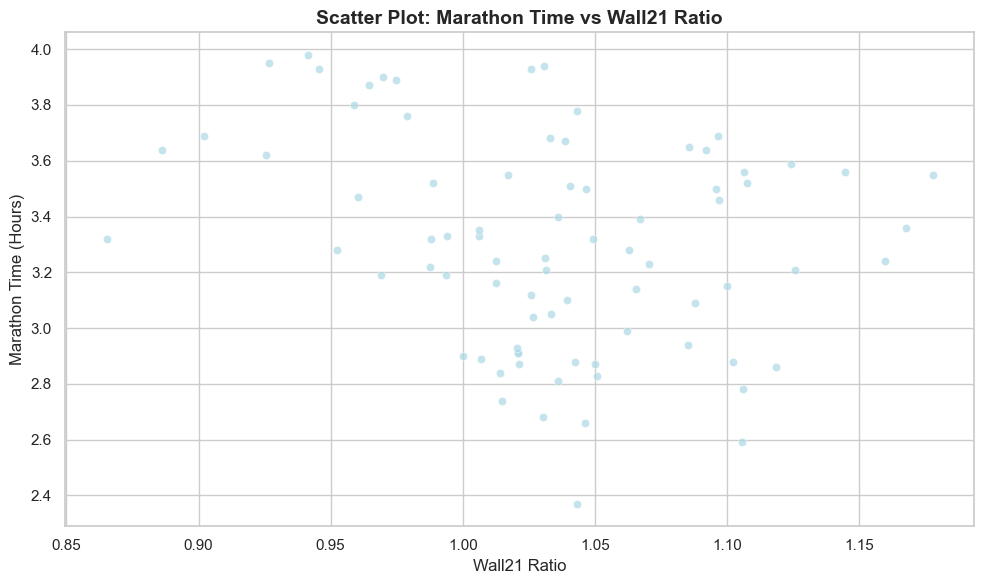

In [93]:
sns.set_theme(style="whitegrid", palette="pastel")

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_marathon, x='Wall21 Ratio', y='MarathonTime', color="lightblue", alpha=0.7)

# Titles and labels
plt.title("Scatter Plot: Marathon Time vs Wall21 Ratio", fontsize=14, weight="bold")
plt.xlabel("Wall21 Ratio", fontsize=12)
plt.ylabel("Marathon Time (Hours)", fontsize=12)

plt.tight_layout()
plt.show()

In [94]:
from scipy.stats import pearsonr

# Calculate Pearson correlation and p-value
correlation, p_value = pearsonr(df_marathon['Wall21 Ratio'], df_marathon['MarathonTime'])

correlation, p_value

(np.float64(-0.2577420112181378), np.float64(0.0209892542377055))

In [95]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Step 1: ANOVA test 
anova_model = ols('MarathonTime ~ C(Wall21_Ratio_Range)', data=df_marathon).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

# Step 2: Linear regression for Wall21 Ratio vs MarathonTime
X = df_marathon['Wall21 Ratio']
y = df_marathon['MarathonTime']

# Add a constant to the predictor for the intercept
X = sm.add_constant(X)

# Fit the regression model
regression_model = sm.OLS(y, X).fit()

# Model summary
regression_summary = regression_model.summary()

anova_table, regression_summary

(                         sum_sq    df         F    PR(>F)
 C(Wall21_Ratio_Range)  2.015439   3.0  5.553673  0.001684
 Residual               9.193516  76.0       NaN       NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:           MarathonTime   R-squared:                       0.066
 Model:                            OLS   Adj. R-squared:                  0.054
 Method:                 Least Squares   F-statistic:                     5.550
 Date:                Wed, 18 Dec 2024   Prob (F-statistic):             0.0210
 Time:                        09:52:39   Log-Likelihood:                -32.153
 No. Observations:                  80   AIC:                             68.31
 Df Residuals:                      78   BIC:                             73.07
 Df Model:                           1                                         
 Covariance Type:            nonrobust              

1.	Wall21 Ratio Segmentation:

•	<1.0 (Balanced pace): Average MarathonTime is 3.56 hours. These runners maintain a very balanced pace between halves, but their times are slightly slower on average.
•	1.0-1.05: This group performs the best, with an average MarathonTime of 3.18 hours. This suggests that slight slowdown in the second half (a ratio close to 1.05) might be optimal.
•	1.05-1.1 and >1.1: These groups have higher variability in times, but average times are around 3.25–3.26 hours.


2.	Relationship Trend:

•	The relationship between Wall21 Ratio and MarathonTime shows a weak upward trend. As the Wall21 Ratio increases (indicating a bigger slowdown in the second half), marathon times slightly increase. Significant slowdowns (higher Wall21 Ratios > 1.1) often correlate with slower overall performance.

3. Optimal Performance:

•	Runners with Wall21 Ratio between 1.0 and 1.05 perform the best on average, reinforcing that a small slowdown is ok for good marathon performance.

In [96]:
import statsmodels.api as sm

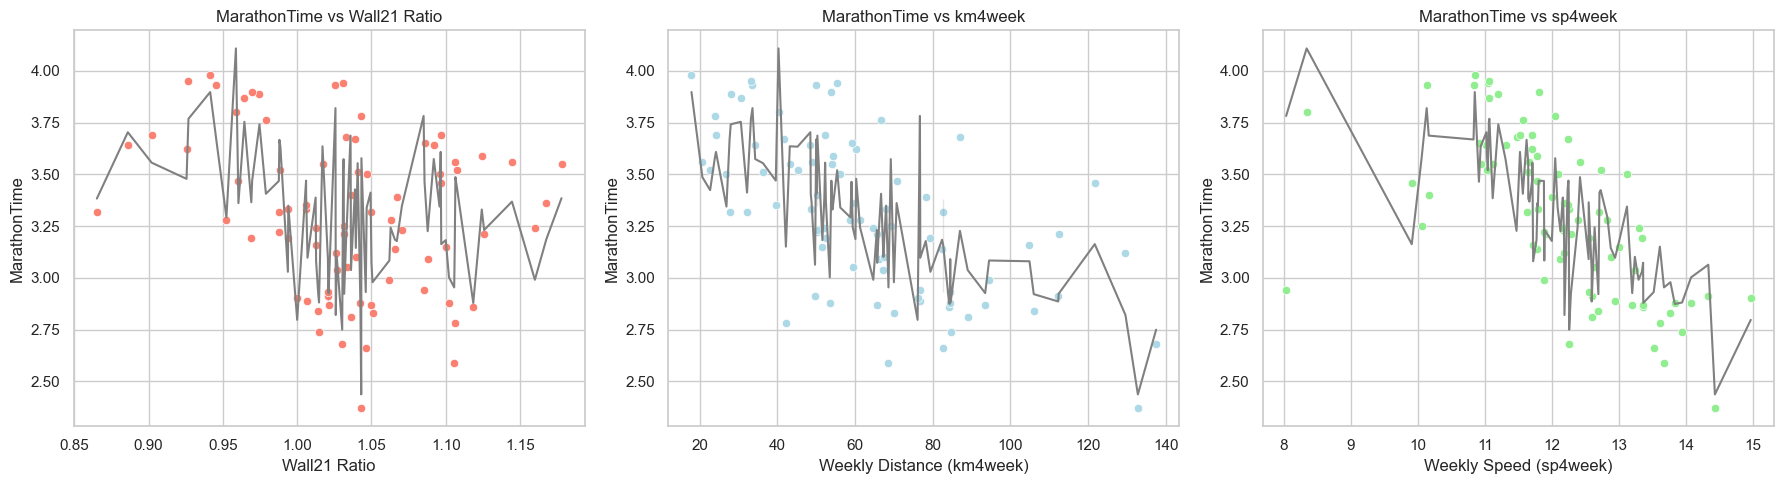

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           MarathonTime   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     52.27
Date:                Wed, 18 Dec 2024   Prob (F-statistic):           1.94e-18
Time:                        09:54:15   Log-Likelihood:                 9.8763
No. Observations:                  80   AIC:                            -11.75
Df Residuals:                      76   BIC:                            -2.224
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.5455      0.443     14.780      0.000       5.663       7.428
Wall21 Ratio    -0.9063      0.400     -2.264      0.026      -1.703      -0.109
km4week         -0.0071      0.001     -7.538      0.000      -0.009      -0.005
sp4week         -0.1537      0.021     -7.289      0.000      -0.196      -0.112
==============================================================================
Omnibus:                        9.842   Durbin-Watson:                   1.425
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               12.886
Skew:                          -0.538   Prob(JB):                      0.00159
Kurtosis:                       4.646   Cond. No.                     1.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
import statsmodels.api as sm

sns.set_theme(style="whitegrid", palette="pastel")

# Prepare predictors and target
X = df_marathon[['Wall21 Ratio', 'km4week', 'sp4week']]  # Include main predictors
y = df_marathon['MarathonTime']

# Add a constant for intercept
X = sm.add_constant(X)

# Fit the multivariable regression model
model = sm.OLS(y, X).fit()

# Display regression results
regression_results = model.summary()

# Visualizations of predictors vs MarathonTime
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Wall21 Ratio vs MarathonTime
sns.scatterplot(data=df_marathon, x='Wall21 Ratio', y='MarathonTime', color="salmon", ax=axes[0])
sns.lineplot(data=df_marathon, x='Wall21 Ratio', y=model.predict(X), color="gray", ax=axes[0])
axes[0].set_title("MarathonTime vs Wall21 Ratio")
axes[0].set_xlabel("Wall21 Ratio")
axes[0].set_ylabel("MarathonTime")

# Plot 2: km4week vs MarathonTime
sns.scatterplot(data=df_marathon, x='km4week', y='MarathonTime', color="lightblue", ax=axes[1])
sns.lineplot(data=df_marathon, x='km4week', y=model.predict(X), color="gray", ax=axes[1])
axes[1].set_title("MarathonTime vs km4week")
axes[1].set_xlabel("Weekly Distance (km4week)")
axes[1].set_ylabel("MarathonTime")

# Plot 3: sp4week vs MarathonTime
sns.scatterplot(data=df_marathon, x='sp4week', y='MarathonTime', color="lightgreen", ax=axes[2])
sns.lineplot(data=df_marathon, x='sp4week', y=model.predict(X), color="gray", ax=axes[2])
axes[2].set_title("MarathonTime vs sp4week")
axes[2].set_xlabel("Weekly Speed (sp4week)")
axes[2].set_ylabel("MarathonTime")

plt.tight_layout()
plt.show()

regression_results

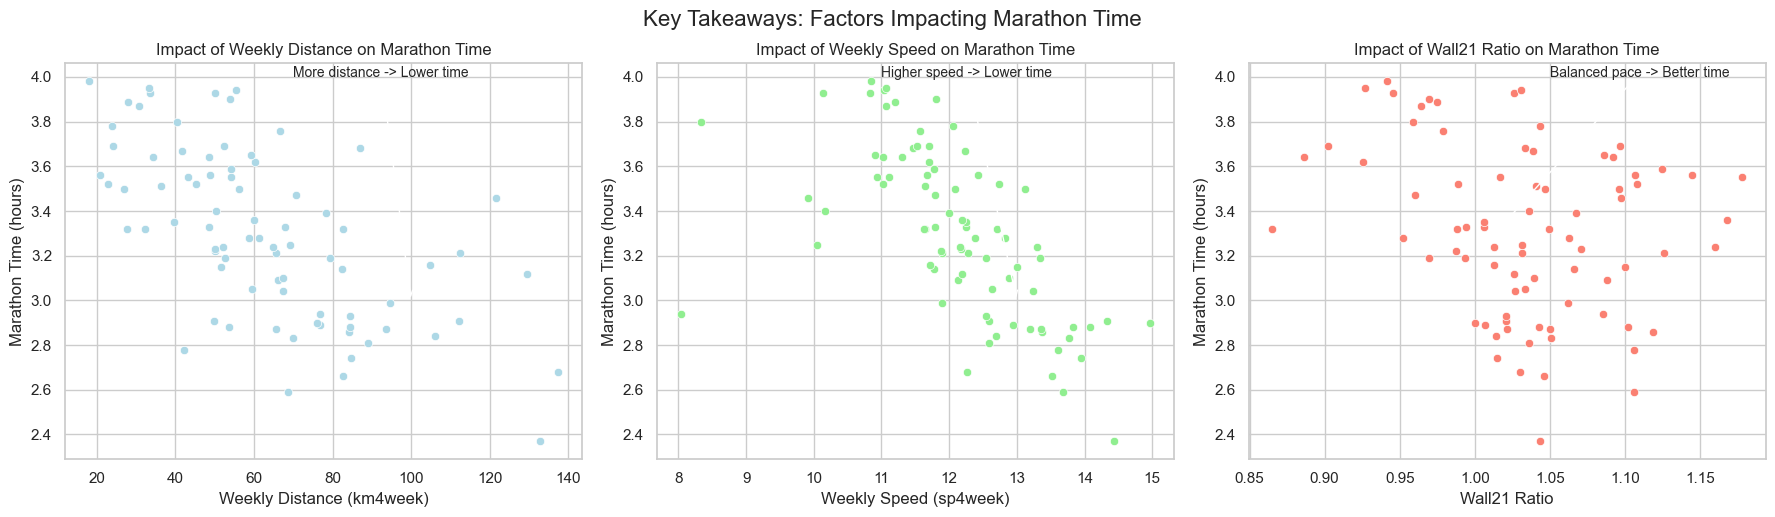

In [98]:


# Set up theme and pastel color palette
sns.set_theme(style="whitegrid", palette="pastel")

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter Plot 1: km4week vs MarathonTime
sns.scatterplot(data=df_marathon, x='km4week', y='MarathonTime', ax=axes[0], color='lightblue', edgecolor='white')
axes[0].set_title("Impact of Weekly Distance on Marathon Time")
axes[0].set_xlabel("Weekly Distance (km4week)")
axes[0].set_ylabel("Marathon Time (hours)")
axes[0].annotate('More distance -> Lower time', xy=(100, 3), xytext=(70, 4),
                 arrowprops=dict(facecolor='gray', arrowstyle='->'), fontsize=10)

# Scatter Plot 2: sp4week vs MarathonTime
sns.scatterplot(data=df_marathon, x='sp4week', y='MarathonTime', ax=axes[1], color='lightgreen', edgecolor='white')
axes[1].set_title("Impact of Weekly Speed on Marathon Time")
axes[1].set_xlabel("Weekly Speed (sp4week)")
axes[1].set_ylabel("Marathon Time (hours)")
axes[1].annotate('Higher speed -> Lower time', xy=(13, 3), xytext=(11, 4),
                 arrowprops=dict(facecolor='gray', arrowstyle='->'), fontsize=10)

# Scatter Plot 3: Wall21 Ratio vs MarathonTime
sns.scatterplot(data=df_marathon, x='Wall21 Ratio', y='MarathonTime', ax=axes[2], color='salmon', edgecolor='white')
axes[2].set_title("Impact of Wall21 Ratio on Marathon Time")
axes[2].set_xlabel("Wall21 Ratio")
axes[2].set_ylabel("Marathon Time (hours)")
axes[2].annotate('Balanced pace -> Better time',
                 xy=(1.0, 3.2), xytext=(1.05, 4),
                 arrowprops=dict(facecolor='gray', arrowstyle='->'), fontsize=10)

# Adjust layout and show the plots
plt.tight_layout()
plt.suptitle("Key Takeaways: Factors Impacting Marathon Time", fontsize=16, y=1.03)
plt.show()

Note: sp4week represents kilometers per hour (km/h), where higher values indicate faster speeds

In [99]:
df_marathon = df_marathon.dropna(subset=['km4week', 'sp4week', 'Wall21 Ratio', 'MarathonTime'])

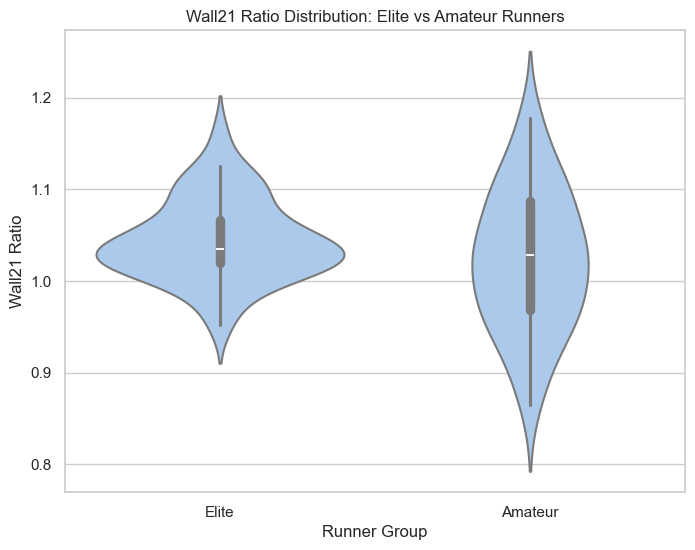

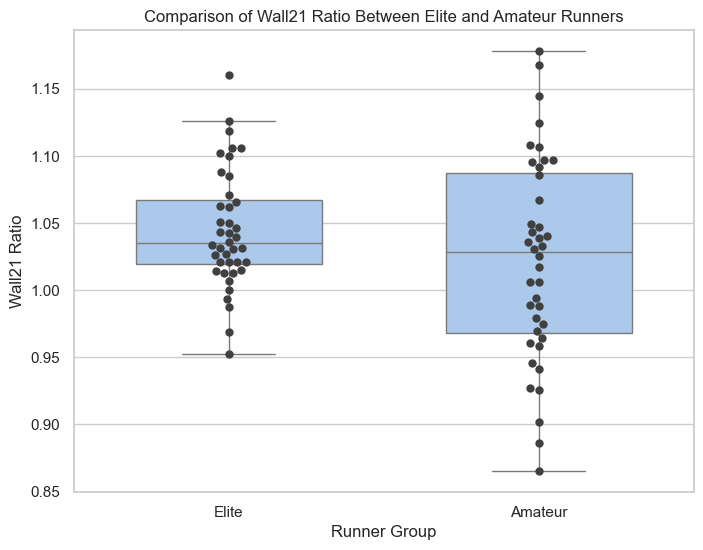

In [100]:
# Define Elite and Amateur groups based on MarathonTime threshold
elite_threshold = df_marathon['MarathonTime'].median()  # Use the median as threshold
df_marathon['RunnerGroup'] = df_marathon['MarathonTime'].apply(lambda x: 'Elite' if x <= elite_threshold else 'Amateur')

sns.set_theme(style="whitegrid", palette="pastel")

# Plot 1: Violin plot of Wall21 Ratio by Runner Group
plt.figure(figsize=(8, 6))
sns.violinplot(data=df_marathon, x='RunnerGroup', y='Wall21 Ratio', inner='box', linewidth=1.5)
plt.title("Wall21 Ratio Distribution: Elite vs Amateur Runners")
plt.xlabel("Runner Group")
plt.ylabel("Wall21 Ratio")
plt.show()

# Plot 2: Boxplot + Swarmplot to visualize Wall21 Ratio
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_marathon, x='RunnerGroup', y='Wall21 Ratio', width=0.6, fliersize=0)
sns.swarmplot(data=df_marathon, x='RunnerGroup', y='Wall21 Ratio', color=".25", size=6)
plt.title("Comparison of Wall21 Ratio Between Elite and Amateur Runners")
plt.xlabel("Runner Group")
plt.ylabel("Wall21 Ratio")
plt.show()

**Insights 


•	Weekly distance (km4week) and speed (sp4week) have the strongest impact on MarathonTime.

•	Wall21 Ratio is also significant: a balanced pace during the marathon improves performance. Elite runners (faster group) have Wall21 values tightly clustered around 1.00, indicating more consistent pacing. 

## Multivariable Analysis

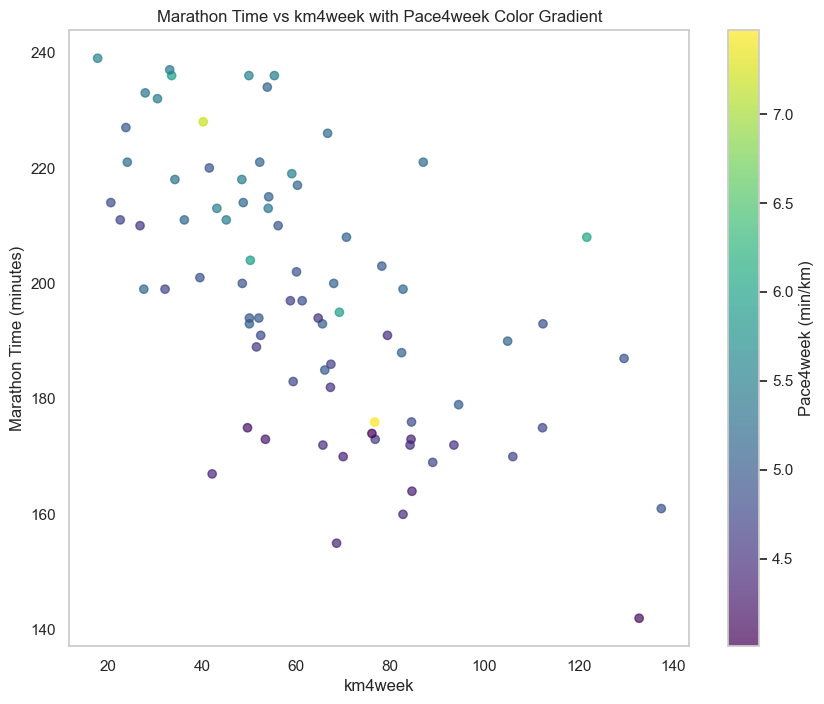

In [103]:

plt.figure(figsize=(10, 8))
data = df_marathon
scatter = plt.scatter(data['km4week'], 
                      data['MarathonTime_mins'], 
                      c=data['Pace4week (min/km)'], 
                      cmap='viridis', 
                      alpha=0.7)
plt.title('Marathon Time vs km4week with Pace4week Color Gradient')
plt.xlabel('km4week')
plt.ylabel('Marathon Time (minutes)')
plt.colorbar(scatter, label='Pace4week (min/km)')
plt.grid()
plt.show()

Both km4week and training pace positively influence marathon performance, with high mileage amplifying the benefits of a faster pace.
Combined effect: High training volume and a faster training pace result in significantly better marathon performance

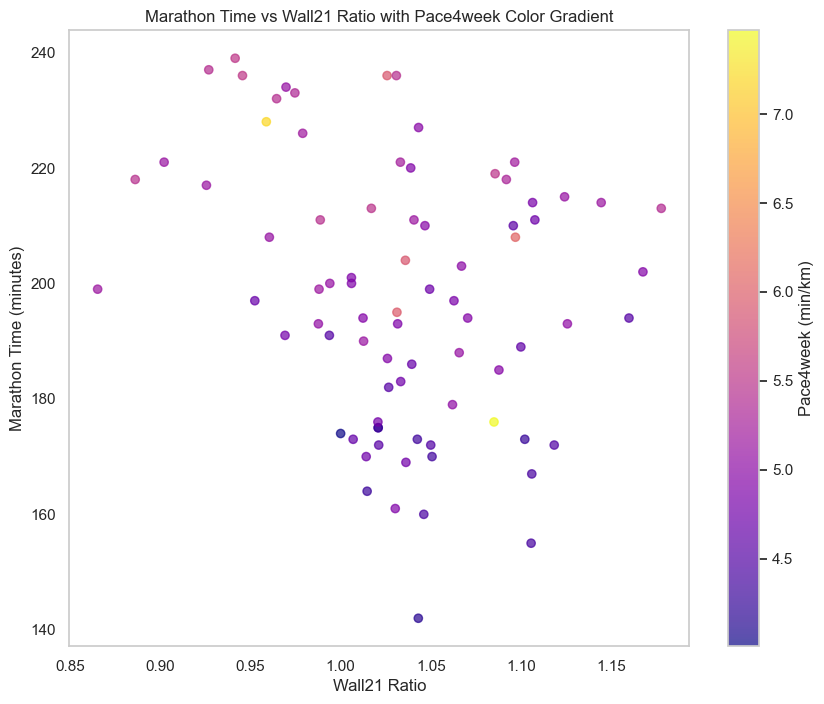

In [106]:
# Create a scatterplot with a color gradient based on Wall21 Ratio
plt.figure(figsize=(10, 8))
scatter = plt.scatter(data['Wall21 Ratio'], 
                      data['MarathonTime_mins'], 
                      c=data['Pace4week (min/km)'], 
                      cmap='plasma', 
                      alpha=0.7)
plt.title('Marathon Time vs Wall21 Ratio with Pace4week Color Gradient')
plt.xlabel('Wall21 Ratio')
plt.ylabel('Marathon Time (minutes)')
plt.colorbar(scatter, label='Pace4week (min/km)')
plt.grid()
plt.show()

Clusters where Wall21 Ratio ≈ 1.0–1.05 and faster paces (lower min/km) correspond to the best marathon times. The color gradient indicates that runners with a lower Pace4week (faster training pace) tend to perform better, regardless of their Wall21 Ratio.

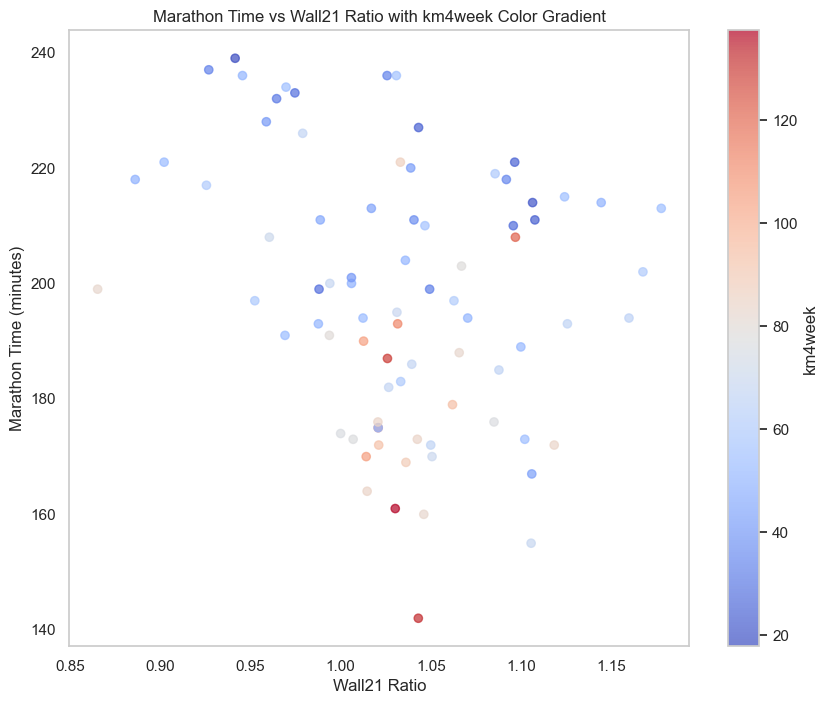

In [108]:
# Create a scatterplot with a color gradient based on km4week
plt.figure(figsize=(10, 8))
scatter = plt.scatter(data['Wall21 Ratio'], 
                      data['MarathonTime_mins'], 
                      c=data['km4week'], 
                      cmap='coolwarm', 
                      alpha=0.7)
plt.title('Marathon Time vs Wall21 Ratio with km4week Color Gradient')
plt.xlabel('Wall21 Ratio')
plt.ylabel('Marathon Time (minutes)')
plt.colorbar(scatter, label='km4week')
plt.grid()
plt.show()

Runners who combine a low Wall21 Ratio (minimal pace drop) and high km4week (intense training volume) achieve the best marathon times.

Higher training mileage helps reduce performance drop-off after 21 km, leading to better overall marathon times.

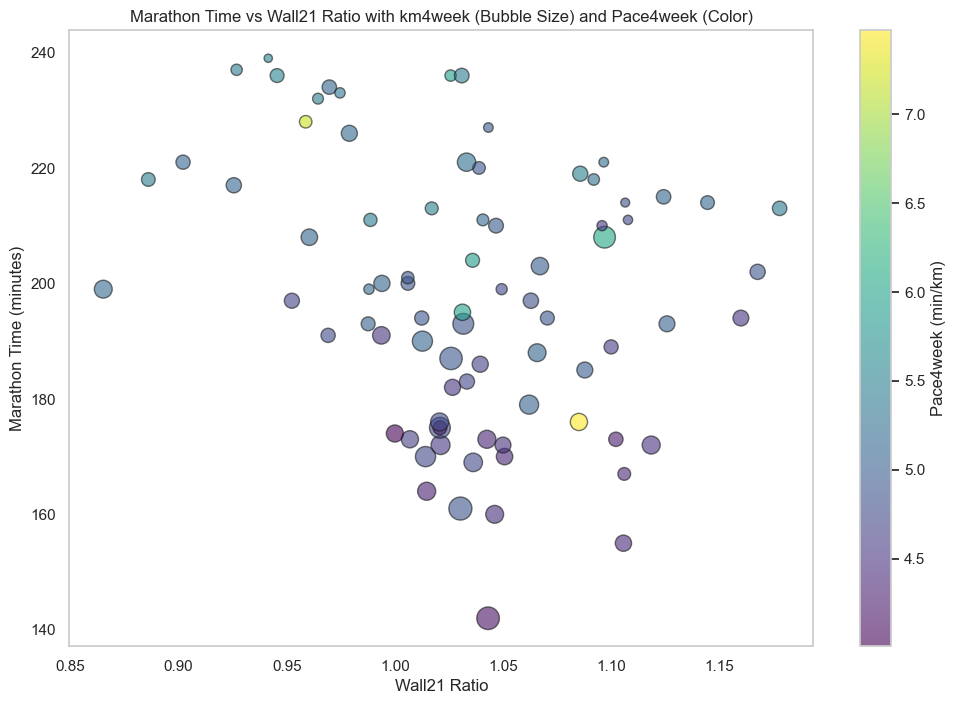

In [109]:
# Bubble chart to represent four variables
plt.figure(figsize=(12, 8))
bubble = plt.scatter(data['Wall21 Ratio'], 
                     data['MarathonTime_mins'], 
                     s=data['km4week'] * 2,  # Scale bubble size
                     c=data['Pace4week (min/km)'], 
                     cmap='viridis', 
                     alpha=0.6, 
                     edgecolor='k')

plt.title('Marathon Time vs Wall21 Ratio with km4week (Bubble Size) and Pace4week (Color)')
plt.xlabel('Wall21 Ratio')
plt.ylabel('Marathon Time (minutes)')
plt.colorbar(bubble, label='Pace4week (min/km)')  # Add color bar
plt.grid()
plt.show()

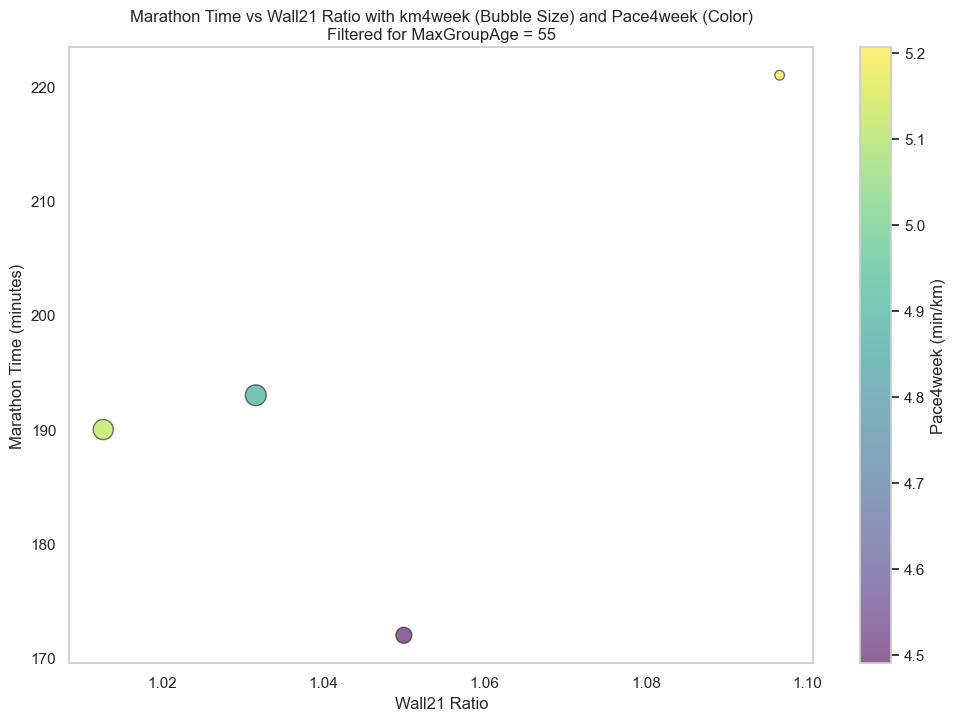

In [111]:


# Filter data for MaxGroupAge = 55
filtered_data = data[data['MaxGroupAge'] == 55]

# Bubble chart to represent four variables
plt.figure(figsize=(12, 8))
bubble = plt.scatter(filtered_data['Wall21 Ratio'], 
                     filtered_data['MarathonTime_mins'], 
                     s=filtered_data['km4week'] * 2,  # Scale bubble size
                     c=filtered_data['Pace4week (min/km)'], 
                     cmap='viridis', 
                     alpha=0.6, 
                     edgecolor='k')

plt.title('Marathon Time vs Wall21 Ratio with km4week (Bubble Size) and Pace4week (Color)\nFiltered for MaxGroupAge = 55')
plt.xlabel('Wall21 Ratio')
plt.ylabel('Marathon Time (minutes)')
plt.colorbar(bubble, label='Pace4week (min/km)')  # Add color bar
plt.grid()
plt.show()

In [112]:
count_55 = (data['MaxGroupAge'] == 55).sum()
count_55

np.int64(4)

## 6. Visualization of key charts

1. Consistent Pacing Leads to Better Performance

    Highlight the negative trend where Wall21 closer to 1.00 leads to better performance.

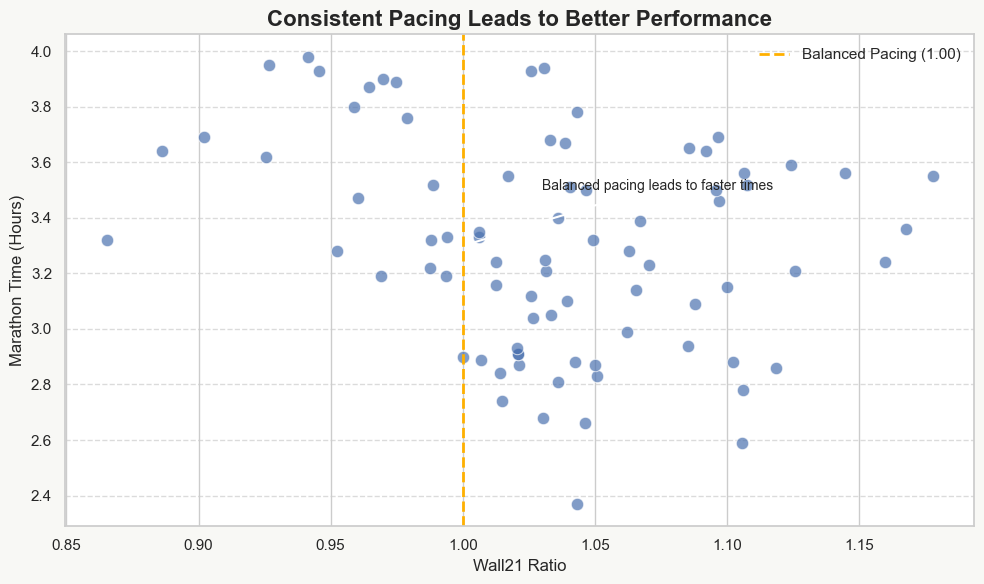

In [113]:

sns.set_theme(style="whitegrid")

# Define custom colors (matching bright style)
background_color = "#f8f8f5"  # Light gray background
point_color = "#4c72b0"       # Bright blue points
highlight_color = "#ffb000"   # Golden yellow for annotations
line_color = "#262626"        # Dark gray for text and annotations

# Create the plot
plt.figure(figsize=(10, 6), facecolor=background_color)
ax = sns.scatterplot(
    data=df_marathon, x="Wall21 Ratio", y="MarathonTime",
    color=point_color, alpha=0.7, s=80  # Slightly larger, semi-transparent points
)

# Highlight the title and labels
plt.title("Consistent Pacing Leads to Better Performance", fontsize=16, weight="bold", color=line_color)
plt.xlabel("Wall21 Ratio", fontsize=12, color=line_color)
plt.ylabel("Marathon Time (Hours)", fontsize=12, color=line_color)

# Annotate the key trend near 1.00
plt.axvline(1.00, color=highlight_color, linestyle="--", linewidth=2, label="Balanced Pacing (1.00)")
plt.annotate("Balanced pacing leads to faster times", 
             xy=(1.00, df_marathon['MarathonTime'].mean()), xytext=(1.03, df_marathon['MarathonTime'].mean() + 0.2),
             arrowprops=dict(facecolor=highlight_color, arrowstyle="->", lw=1.5),
             fontsize=10, color=line_color)

# Customizing gridlines and legend
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc="upper right", frameon=False)

# Adjust layout
plt.tight_layout()
plt.show()

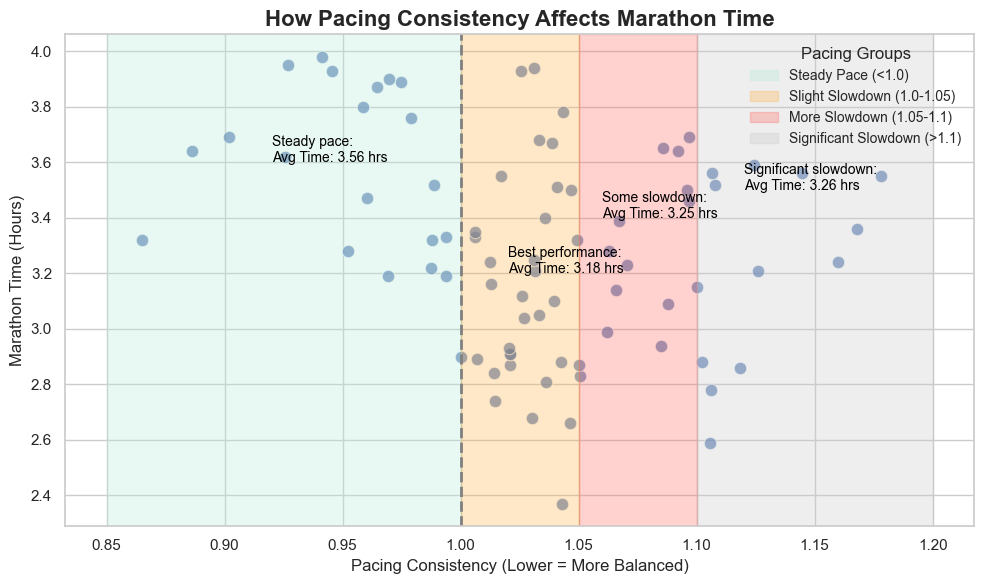

In [114]:

# Set Seaborn style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Define colors for ranges
colors = {
    "<1.0": "#B5EAD7",      # Light green for balanced pace
    "1.0-1.05": "#FFB347",  # Yellow-orange for best performance
    "1.05-1.1": "#FF6961",  # Light red for slower performance
    ">1.1": "#C9C9C9"       # Gray for highest variability
}

# Scatter plot
sns.scatterplot(
    data=df_marathon, x="Wall21 Ratio", y="MarathonTime", 
    color="#4c72b0", alpha=0.7, s=80
)

# Highlight ranges with clear labels
plt.axvspan(0.85, 1.0, color=colors["<1.0"], alpha=0.3, label="Steady Pace (<1.0)")
plt.axvspan(1.0, 1.05, color=colors["1.0-1.05"], alpha=0.3, label="Slight Slowdown (1.0-1.05)")
plt.axvspan(1.05, 1.1, color=colors["1.05-1.1"], alpha=0.3, label="More Slowdown (1.05-1.1)")
plt.axvspan(1.1, 1.2, color=colors[">1.1"], alpha=0.3, label="Significant Slowdown (>1.1)")

# Titles and axis labels (simplified)
plt.title("How Pacing Consistency Affects Marathon Time", fontsize=16, weight="bold")
plt.xlabel("Pacing Consistency (Lower = More Balanced)", fontsize=12)
plt.ylabel("Marathon Time (Hours)", fontsize=12)

# Add simplified annotations
plt.annotate("Steady pace:\nAvg Time: 3.56 hrs", xy=(0.92, 3.6), fontsize=10, color="black")
plt.annotate("Best performance:\nAvg Time: 3.18 hrs", xy=(1.02, 3.2), fontsize=10, color="black")
plt.annotate("Some slowdown:\nAvg Time: 3.25 hrs", xy=(1.06, 3.4), fontsize=10, color="black")
plt.annotate("Significant slowdown:\nAvg Time: 3.26 hrs", xy=(1.12, 3.5), fontsize=10, color="black")

# Add a dashed vertical line for balanced pacing
plt.axvline(1.0, color="gray", linestyle="--", linewidth=2)

# Add legend with simpler descriptions
plt.legend(loc="upper right", title="Pacing Groups", fontsize=10, frameon=False)

# Final adjustments
plt.tight_layout()
plt.show()

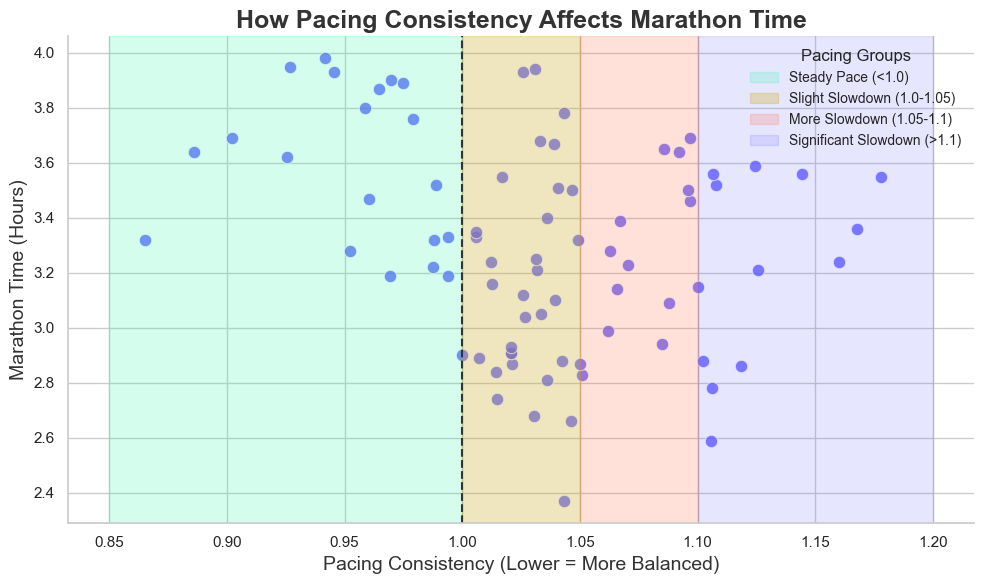

In [115]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Custom color palette inspired by the uploaded image
colors = {
    "<1.0": "#2EF7A6",      # Light green for balanced pace
    "1.0-1.05": "#CBAE2C",  # Yellow-gold for best performance
    "1.05-1.1": "#FF6C44",  # Orange for slower performance
    ">1.1": "#5E5BFF"       # Blue for highest variability
}

# Scatter plot
sns.scatterplot(
    data=df_marathon, x="Wall21 Ratio", y="MarathonTime", 
    color=colors[">1.1"], s=80, alpha=0.8, edgecolor="white"
)

# Highlight Wall21 Ratio ranges with colors
plt.axvspan(0.85, 1.0, color=colors["<1.0"], alpha=0.2, label="Steady Pace (<1.0)")
plt.axvspan(1.0, 1.05, color=colors["1.0-1.05"], alpha=0.3, label="Slight Slowdown (1.0-1.05)")
plt.axvspan(1.05, 1.1, color=colors["1.05-1.1"], alpha=0.2, label="More Slowdown (1.05-1.1)")
plt.axvspan(1.1, 1.2, color=colors[">1.1"], alpha=0.15, label="Significant Slowdown (>1.1)")

# Add modern titles and labels
plt.title("How Pacing Consistency Affects Marathon Time", fontsize=18, weight="bold", color="#333333")
plt.xlabel("Pacing Consistency (Lower = More Balanced)", fontsize=14, color="#333333")
plt.ylabel("Marathon Time (Hours)", fontsize=14, color="#333333")

# Vertical line for Wall21 Ratio = 1.0
plt.axvline(1.0, color="#333333", linestyle="--", linewidth=1.5)

# Add clean legend
plt.legend(title="Pacing Groups", loc="upper right", fontsize=10, frameon=False, title_fontsize="12")

# Remove spines for a clean look
sns.despine()

# Final adjustments
plt.tight_layout()
plt.show()

2. Training Mileage is Positively Correlated with Performance

    Higher weekly mileage reduces marathon time

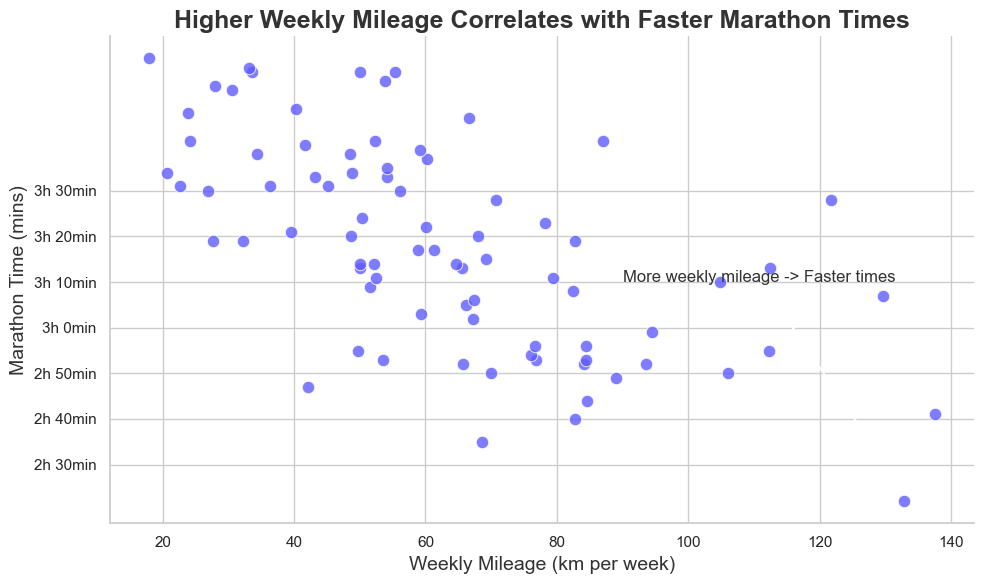

In [121]:

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Custom y-ticks: From 150 minutes (2h 30min) to 210 minutes (3h 30min)
yticks = np.arange(150, 220, 10)
ytick_labels = [f"{h}h {m}min" for h, m in [(t // 60, t % 60) for t in yticks]]

# Scatter plot: km4week vs MarathonTime_mins
sns.scatterplot(
    data=df_marathon, x="km4week", y="MarathonTime_mins", 
    color="#5E5BFF", s=80, alpha=0.8, edgecolor="white"
)

# Titles and labels
plt.title("Higher Weekly Mileage Correlates with Faster Marathon Times", fontsize=18, weight="bold", color="#333333")
plt.xlabel("Weekly Mileage (km per week)", fontsize=14, color="#333333")
plt.ylabel("Marathon Time (mins)", fontsize=14, color="#333333")

# Set custom y-ticks and labels
plt.yticks(yticks, ytick_labels)

# Add annotation
plt.annotate("More weekly mileage -> Faster times",
             xy=(130, 150), xytext=(90, 190),
             arrowprops=dict(facecolor="#FF6C44", arrowstyle="->", lw=1.5),
             fontsize=12, color="#333333")

# Remove spines for a clean look
sns.despine()

plt.tight_layout()
plt.show()

3. Training speed Impacts Marathin times

In [124]:
df_marathon.head()

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY,MaxGroupAge,MarathonTime_mins,Ideal Marathon Time_mins,Wall21_total_minutes,Second Half Time,Wall21 Ratio,Pace4week (min/km),Wall21_Ratio_Range,RunnerGroup
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,nocrosstr,1.16,2.37,A,40,142,139.2,70.0,1.21,1.043103,4.156627,1.0-1.05,Elite
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,nocrosstr,1.23,2.59,A,40,155,147.6,74.0,1.36,1.105691,4.387755,>1.1,Elite
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,nocrosstr,1.30,2.66,A,40,160,156.0,78.0,1.36,1.046154,4.437727,1.0-1.05,Elite
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,nocrosstr,1.32,2.68,A,50,161,158.4,79.0,1.36,1.030303,4.894545,1.0-1.05,Elite
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,nocrosstr,1.36,2.74,A,40,164,163.2,82.0,1.38,1.014706,4.302600,1.0-1.05,Elite


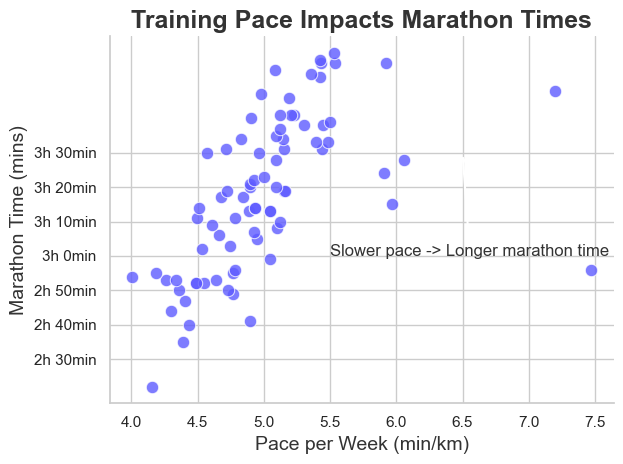

In [128]:
yticks = np.arange(150, 220, 10)
ytick_labels = [f"{h}h {m}min" for h, m in [(t // 60, t % 60) for t in yticks]]

# Scatter plot: Pace4week (min/km) vs MarathonTime_mins
sns.scatterplot(
    data=df_marathon, x="Pace4week (min/km)", y="MarathonTime_mins", 
    color="#5E5BFF", s=80, alpha=0.8, edgecolor="white"
)

# Titles and labels
plt.title("Training Pace Impacts Marathon Times", fontsize=18, weight="bold", color="#333333")
plt.xlabel("Pace per Week (min/km)", fontsize=14, color="#333333")
plt.ylabel("Marathon Time (mins)", fontsize=14, color="#333333")


plt.yticks(yticks, ytick_labels)


plt.annotate("Slower pace -> Longer marathon time",
             xy=(6.5, 210), xytext=(5.5, 180),
             arrowprops=dict(facecolor="#FF6C44", arrowstyle="->", lw=1.5),
             fontsize=12, color="#333333")


sns.despine()

plt.tight_layout()
plt.show()

4. Elite Runners are Better at Pacing

/var/folders/r2/m617yygs46q4sg5bxxgr4c6r0000gn/T/ipykernel_84449/396998360.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_marathon, x='RunnerGroup', y='Wall21 Ratio',


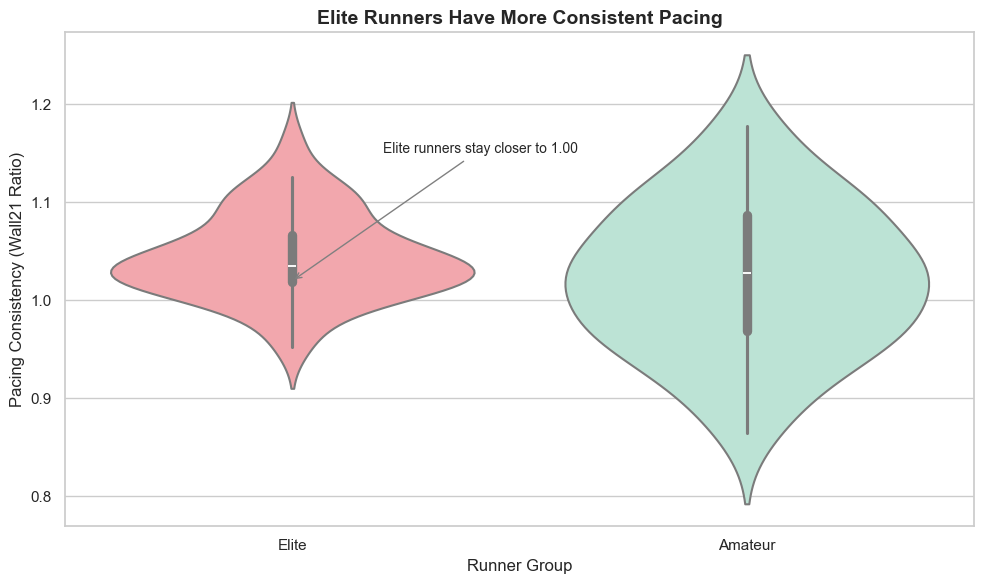

In [129]:
# Group runners into 'Elite' and 'Amateur' based on median Marathon Time
median_time = df_marathon['MarathonTime'].median()
df_marathon['RunnerGroup'] = df_marathon['MarathonTime'].apply(
    lambda x: 'Elite' if x <= median_time else 'Amateur'
)

# Create a violin plot for pacing consistency (Wall21 Ratio)
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_marathon, x='RunnerGroup', y='Wall21 Ratio', 
               inner='box', linewidth=1.5, palette=["#FF9AA2", "#B5EAD7"])

# Add title, labels, and annotation
plt.title("Elite Runners Have More Consistent Pacing", fontsize=14, weight="bold")
plt.xlabel("Runner Group", fontsize=12)
plt.ylabel("Pacing Consistency (Wall21 Ratio)", fontsize=12)

# Highlight the Elite group's pacing
plt.annotate("Elite runners stay closer to 1.00", xy=(0, 1.02), xytext=(0.2, 1.15),
             arrowprops=dict(arrowstyle="->", color="gray"), fontsize=10)

# Clean up the plot
plt.tight_layout()
plt.show()

In [130]:

df_marathon.to_csv("./data/modified_marathon_data_v5.csv", index=False)
